To go to Milestone 3, click the link !

[Milestone 3](#Milestone-3)


# Milestone 2: Data collection and description

We split the exploration into different parts.

- [Broad analysis](#Approach)
- [Tags analysis](#Tags-Analysis)
- [Artists analysis](#Artists-Analysis)

First of all, we import libraries and fetch the data.

In [9]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
import os
import hdf5_getters3 as hdf5_getters
from scipy.interpolate import spline
from matplotlib.pyplot import cm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from pprint import pprint
import folium
import re 
import math
from urllib.request import urlopen
import json
import time
import networkx as nx
from functools import partial  
%matplotlib inline

from IPython.display import display
# Allow to display html 
from IPython.core.display import display, HTML

ImportError: No module named folium

In [5]:
# print line by line the elements of the list
def printList(liste):
    for elem in liste:
        print(elem)

#function to load and display saved maps 
def displaymap(url):
    iframe='<iframe src=' + url+ ' width=900 height=700></iframe>'
    display(HTML(iframe))


We parse the data and store all the relevant information we care about the metadata in a csv file. We will look at the following features: 
- title
- song_id
- artist_mbid
- artist_id
- artist_name
- artist_familiarity
- artist_similarity
- artist_latitude
- artist_longitude
- artist_mbtags
- artist_terms
- artist_hotttnesss
- danceability
- energy
- duration 
- key
- loudness
- song_hotttnesss
- tempo
- year

In [6]:
def create_csv():
    # The data frame we will store the data in
    df=pd.DataFrame(columns=['track_id','title','song_id','artist_mbid','artist_id','artist_name','artist_familiarity','artist_similarity',
                                        'artist_latitude','artist_longitude','artist_mbtags','artist_terms','artist_hotttnesss',
                                        'danceability','energy','duration','key','loudness','song_hotttnesss','tempo','year'])
    df=df.set_index('track_id')

    counter=0
    # We will cover each h5 files
    for (dirpath, dirnames, filenames) in os.walk("./data/MillionSongSubset/data"):
        for filename in filenames:
            if counter % 1000==0:
                print(str(int(counter/100))+"%")
            counter+=1
            # We extract the metadata we are interested in.
            h5 = hdf5_getters.open_h5_file_read(os.path.join(dirpath,filename))
            track_id = hdf5_getters.get_track_id(h5).decode()
            title = hdf5_getters.get_title(h5).decode()
            song_id = hdf5_getters.get_song_id(h5).decode()
            artist_id = hdf5_getters.get_artist_id(h5).decode()
            artist_mbid = hdf5_getters.get_artist_mbid(h5).decode()
            artist_name = hdf5_getters.get_artist_name(h5).decode()
            artist_familiarity = hdf5_getters.get_artist_familiarity(h5)
            artist_similarity = [item.decode() for item in hdf5_getters.get_similar_artists(h5)]
            artist_latitude = hdf5_getters.get_artist_latitude(h5)
            artist_longitude = hdf5_getters.get_artist_longitude(h5)
            artist_mbtags = [tag.decode() for tag in hdf5_getters.get_artist_mbtags(h5)]
            artist_hotttnesss = hdf5_getters.get_artist_hotttnesss(h5)
            artist_terms = [tag.decode() for tag in hdf5_getters.get_artist_terms(h5)]
            danceability = hdf5_getters.get_danceability(h5)
            energy = hdf5_getters.get_energy(h5)
            duration = hdf5_getters.get_duration(h5)
            key = hdf5_getters.get_key(h5)
            loudness = hdf5_getters.get_loudness(h5)
            song_hotttnesss = hdf5_getters.get_song_hotttnesss(h5)
            tempo = hdf5_getters.get_tempo(h5)
            year = hdf5_getters.get_year(h5)
            # We add the metadata to our dataframe
            df.loc[track_id]=[title,song_id,artist_mbid,artist_id,artist_name,artist_familiarity,
                                         artist_similarity, artist_latitude, artist_longitude, artist_mbtags,
                                         artist_terms,artist_hotttnesss,danceability,energy,duration, key, loudness,
                                         song_hotttnesss,tempo,year]
            h5.close()
    # We store the data to a csv file      
    df.to_csv('data/metadata.csv',encoding='utf-8')

In [2]:
df = pd.read_csv('data/metadata.csv',encoding='utf-8')

In [8]:
printList(df.columns)

track_id
title
song_id
artist_mbid
artist_id
artist_name
artist_familiarity
artist_similarity
artist_latitude
artist_longitude
artist_mbtags
artist_terms
artist_hotttnesss
danceability
energy
duration
key
loudness
song_hotttnesss
tempo
year


In [9]:
df.head()

,track_id,title,song_id,artist_mbid,artist_id,artist_name,artist_familiarity,artist_similarity,artist_latitude,artist_longitude,...,artist_terms,artist_hotttnesss,danceability,energy,duration,key,loudness,song_hotttnesss,tempo,year
0,TRAAAAW128F429D538,I Didn't Mean To,SOMZWCG12A8C13C480,e77e51a5-4761-45b3-9847-2051f811e366,ARD7TVE1187B99BFB1,Casual,0.581794,"['ARV4KO21187FB38008', 'ARWHM281187FB3D381', '...",NaN,NaN,...,"['hip hop', 'underground rap', 'g funk', 'alte...",0.401998,0.0,0.0,218.93179,1.0,-11.197,0.602120,92.198,0.0
1,TRAAABD128F429CF47,Soul Deep,SOCIWDW12A8C13D406,1c78ab62-db33-4433-8d0b-7c8dcf1849c2,ARMJAGH1187FB546F3,The Box Tops,0.630630,"['ARSZWK21187B9B26D7', 'ARLDW2Y1187B9B544F', '...",35.14968,-90.04892,...,"['blue-eyed soul', 'pop rock', 'blues-rock', '...",0.417500,0.0,0.0,148.03546,6.0,-9.843,NaN,121.274,1969.0
2,TRAAADZ128F9348C2E,Amor De Cabaret,SOXVLOJ12AB0189215,7a273984-edd9-4451-9c4d-39b38f05ebcd,ARKRRTF1187B9984DA,Sonora Santanera,0.487357,"['ARFSJUG11C8A421AAD', 'AR8SD041187FB36015', '...",NaN,NaN,...,"['salsa', 'cumbia', 'tejano', 'ranchera', 'lat...",0.343428,0.0,0.0,177.47546,8.0,-9.689,NaN,100.070,0.0
3,TRAAAEF128F4273421,Something Girls,SONHOTT12A8C13493C,e188a520-9cb7-4f73-a3d7-2f70c6538e92,AR7G5I41187FB4CE6C,Adam Ant,0.630382,"['AR4R0741187FB39AF2', 'AR0D7K21187B9AD14E', '...",NaN,NaN,...,"['pop rock', 'new wave', 'dance rock', 'rock',...",0.454231,0.0,0.0,233.40363,0.0,-9.013,NaN,119.293,1982.0
4,TRAAAFD128F92F423A,Face the Ashes,SOFSOCN12A8C143F5D,c6903a2e-063c-4f91-a284-17b8f421be7b,ARXR32B1187FB57099,Gob,0.651046,"['ARUA62A1187B99D9B0', 'ARHJFFY1187B98BA76', '...",NaN,NaN,...,"['pop punk', 'ska punk', 'breakcore', 'alterna...",0.401724,0.0,0.0,209.60608,2.0,-4.501,0.604501,129.738,2007.0


# Approach

Here we will explore the data in a broad way, by analyzing the distribution of our datasets against the years.   
Then we will observe the evolution of certain features that related to songs throughout the year.    
Finally, we will try to see the correlation between song and artist related features 

# Distribution of songs accross the year 

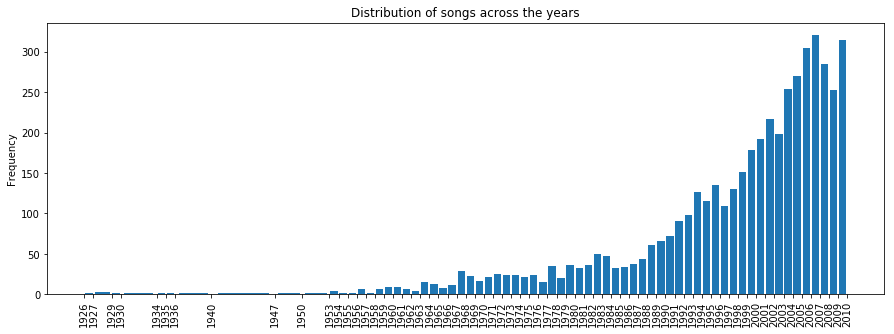

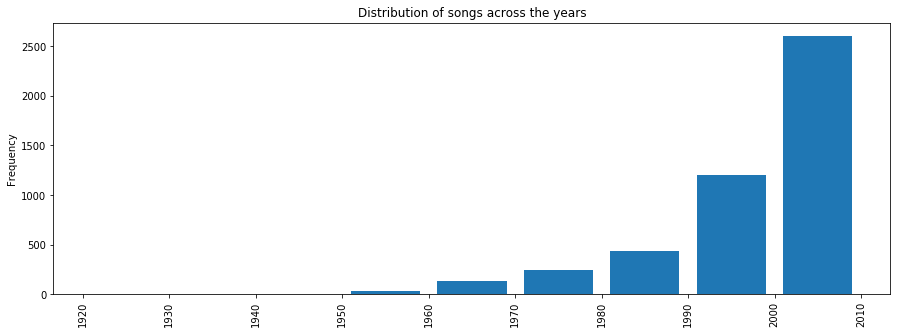

In [10]:
def plot_dist(dframe, name='years', unique_val=10):
    # Create figure and plot dataframe distribution without dist fitting
    fig,ax = plt.subplots(figsize=(15,5))
    dframe.plot.hist(by='year',bins = unique_val, rwidth=0.8)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.xaxis.set_ticks(unique_val)
    plt.xticks(rotation=90)
    plt.title('Distribution of songs across the ' + name)


#remove zero values for year 
df_year = df['year'][df['year'] != 0]

#unique year values sorted: 
nb_year = sorted(df_year.unique())
plot_dist(df_year,'years', unique_val=nb_year)

# Extract for tens of year 
nb_year_tens = range(1920,2020,10)
# print(list(nb_year_tens))

# Plot distributions of songs for tens of years 
plot_dist(df_year, 'years', unique_val = nb_year_tens)

We observe that the songs are mainly distributed after the 2000's, and that before 1970's we have really few data. 
Thus we may want to limit our analysis between 1970 and 2010. 

# Distribution of artists across the world 

We want to display the distribution of artists across the world based on their coordinates. 

In [11]:
df_artist_coord = df[['artist_latitude', 'artist_longitude','artist_name']][df['artist_latitude'].notnull() & df['artist_longitude'].notnull()]
df_artist_coord.head()

,artist_latitude,artist_longitude,artist_name
1,35.14968,-90.04892,The Box Tops
10,35.21962,-80.01955,JennyAnyKind
15,43.64856,-79.38533,Blue Rodeo
16,37.16793,-95.84502,Richard Souther
20,34.31109,-94.02978,Jimmy Wakely


In [12]:
Lausanne = [46.519962, 6.633597]

map = folium.Map(location=Lausanne, zoom_start=2 )
loading = 0
for index, row in df_artist_coord.iterrows():
    
    popup_text = re.escape(row['artist_name'])
#     folium.Marker(location = [row['artist_latitude'], row['artist_longitude']],
#                   popup = popup_text).add_to(map)
    folium.RegularPolygonMarker(location = [row['artist_latitude'], row['artist_longitude']],
        popup = popup_text,
        fill_color="#43d9de",
        radius = 5).add_to(map)

    loaded = loading/(len(df_artist_coord))*100
    if(loading%int(math.ceil(len(df_artist_coord)/10)) == 0):
        print(str(int(loaded)) + "%")
    loading += 1
    
url_save = "./html/artists_map.html"
map.save(url_save)
displaymap(url_save)

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%


We can see that most of the artists are located in the US and in Europe. 

In [13]:
# Plotting functions 

def display_boxplot_year(df, feature):
    # create boxplots on the year axes according to one feature
    plt.subplots(figsize=(15,6))
    bplot = sns.boxplot(x='year', y=feature, data=df)
    plt.xticks(rotation=90)
    plt.title('Distribution of '+feature+' for each year')
    plt.show()
    
def display_boxplot_year_no_outliers(df, feature):
    # create boxplots on the year axes according to one feature without outliers 
    plt.subplots(figsize=(15,6))
    bplot = sns.boxplot(x='year', y=feature, data=df,showfliers=False)
    plt.xticks(rotation=90)
    plt.title('Distribution of '+feature+' for each year')
    plt.show()
    
def display_scatterplot_year(df,feature):
    # create scatterplot on the year axes according to one feature
    plt.subplots(figsize=(15,6))
    bplot = sns.regplot(x='year', y=feature, data=df, fit_reg = False)
    plt.xticks(rotation=90)
    plt.title('Distribution of '+feature+' for each year')
    plt.show()
    
def extract_df_feature_year(df,feature):
    df_result = df[[feature, 'year']][(df['year'] != 0.0) & (df[feature] != 0.0) & (df[feature].notnull())]
    return df_result

# Basic features analysis against years 

## Aproach : 
For the feature analysis, we select some features from the datasets, then remove the one for which we don't have data, and finally plot their evolution against years. 

In [14]:
to_analyze_first = ['danceability', 'duration', 'energy','key', 'loudness', 'tempo', 'song_hotttnesss']

x_axis = ['year', 'genre']
printList(to_analyze_first)

danceability
duration
energy
key
loudness
tempo
song_hotttnesss


We want to know for which of the features we want to analyze, we have no data.   
We then construct a list of features for which we have data. 


In [15]:
to_analyze = []
for feat in to_analyze_first:
    if(df[feat][(df[feat] != 0) & (df[feat].notnull())].empty):
        print("no data for ", feat)
    else:
        to_analyze.append(feat)
        
print("\n\n" + 100*"*")
print("to analyze, new list : ")
print("\n")
printList(to_analyze)

no data for  danceability
no data for  energy


****************************************************************************************************
to analyze, new list : 


duration
key
loudness
tempo
song_hotttnesss


## Amount of data for each feature 

We will plot a bar plot to show how much data we have for each feature that is not NaN or 0. 


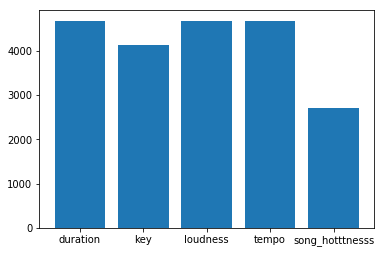

In [16]:
hist_data = {}

for feat in to_analyze:
    df_feat = extract_df_feature_year(df,feat)
    hist_data[feat] = len(df_feat)
    
fig, ax = plt.subplots()
plt.bar(range(len(hist_data)), hist_data.values(), align='center')
plt.xticks(range(len(hist_data)), hist_data.keys())
plt.show()


We observe that we have less data for song_hotttnesss but globally the data is substantial when we have it. 

## Song duration 

In [17]:
# Extract song duration and year and remove unknown values 
df_duration = extract_df_feature_year(df,'duration')
df_duration.head()

,duration,year
1,148.03546,1969.0
3,233.40363,1982.0
4,209.60608,2007.0
8,269.81832,1984.0
14,307.38240,1986.0


In [18]:
# Number of songs for which we have the duration 
len(df_duration)

4680

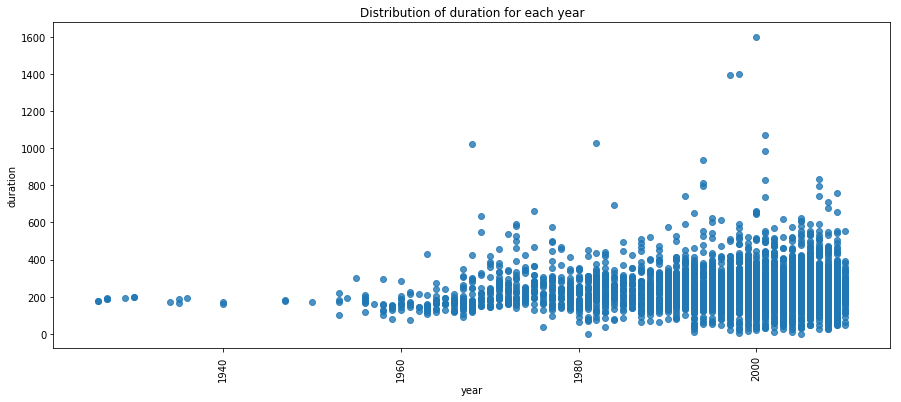

In [19]:
display_scatterplot_year(df_duration, 'duration')

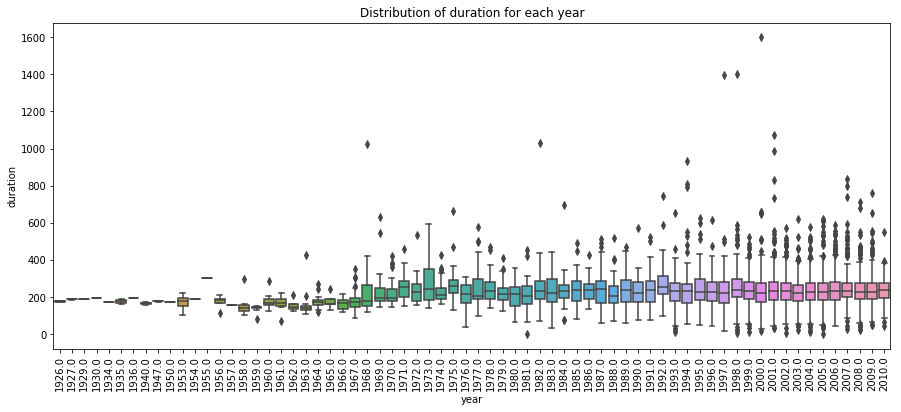

In [20]:
display_boxplot_year(df=df_duration, feature='duration')

We see that the outliers are big around years 1998 - 2002.     
We will not plot them in order to get a better understanding of the graph. 


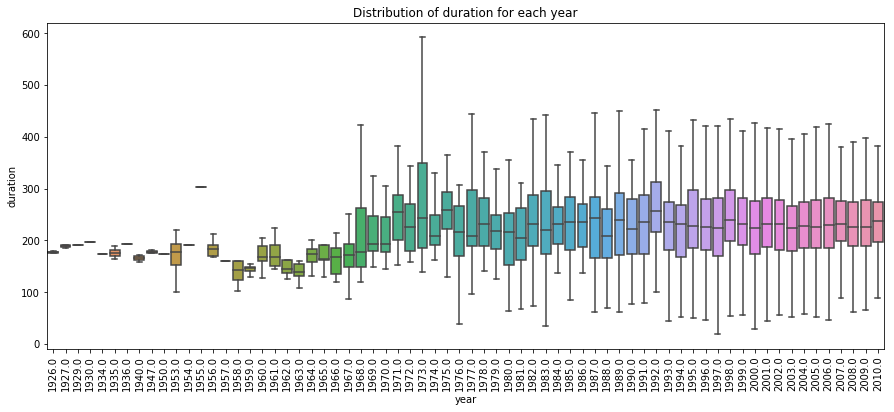

In [21]:
display_boxplot_year_no_outliers(df=df_duration, feature='duration')

We observe that there is a small evolution in song duration especially after 1968. 

## Song loudness 

In [22]:
df_loudness = extract_df_feature_year(df,'loudness')
df_loudness.head()

,loudness,year
1,-9.843,1969.0
3,-9.013,1982.0
4,-4.501,2007.0
8,-13.496,1984.0
14,-8.346,1986.0


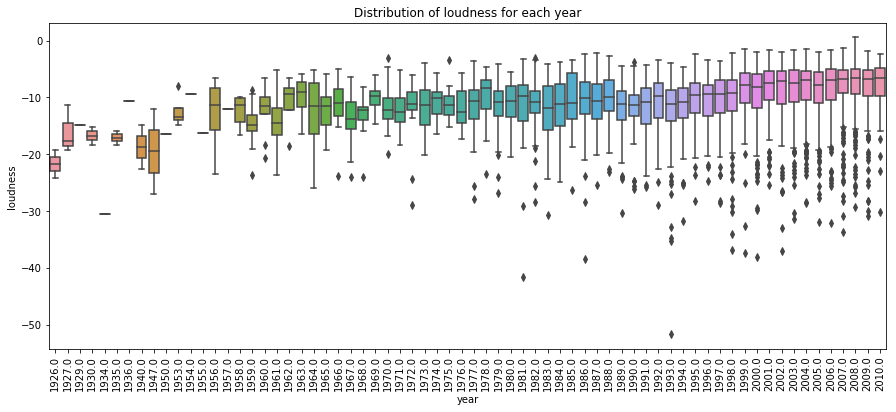

In [23]:
display_boxplot_year(df_loudness,'loudness')

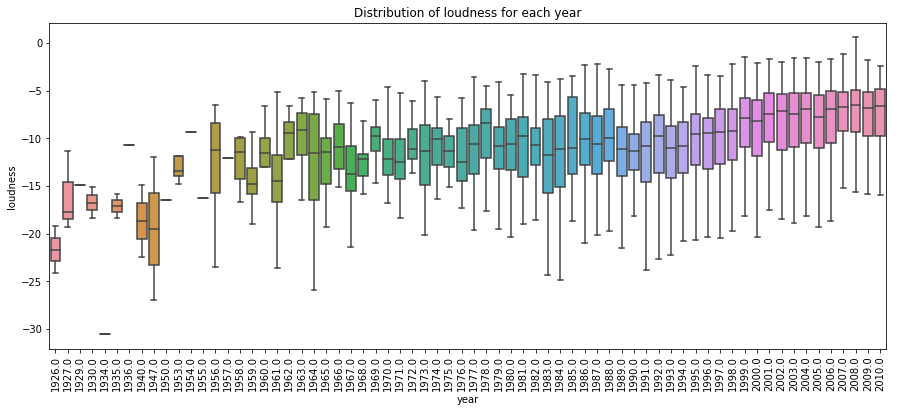

In [24]:
display_boxplot_year_no_outliers(df_loudness,'loudness')

We observe an increase of the loudness throughout the years. 


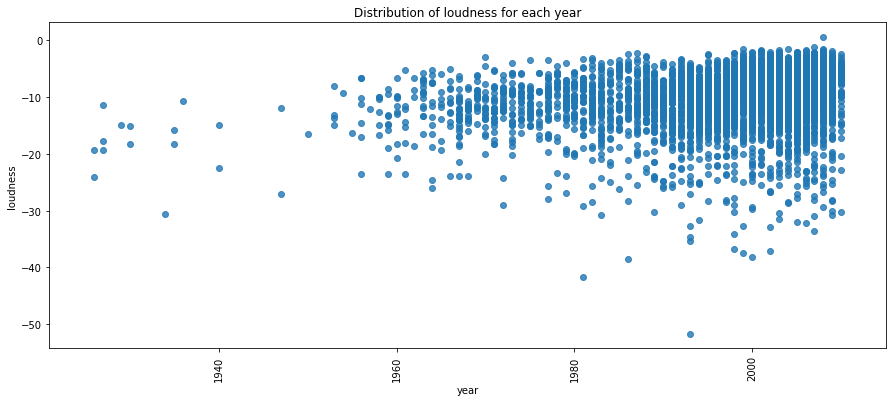

In [25]:
display_scatterplot_year(df_loudness,'loudness')

## Song Tempo

In [26]:
df_tempo = extract_df_feature_year(df, 'tempo')
df_tempo.head()

,tempo,year
1,121.274,1969.0
3,119.293,1982.0
4,129.738,2007.0
8,86.643,1984.0
14,125.197,1986.0


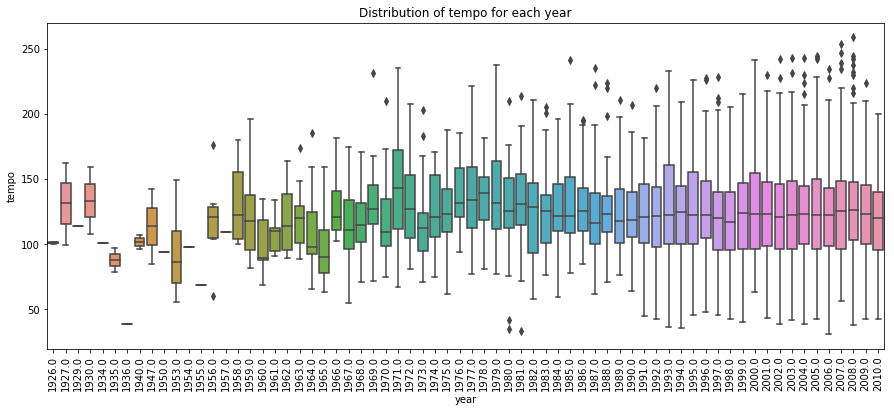

In [27]:
display_boxplot_year(df=df_tempo, feature='tempo')

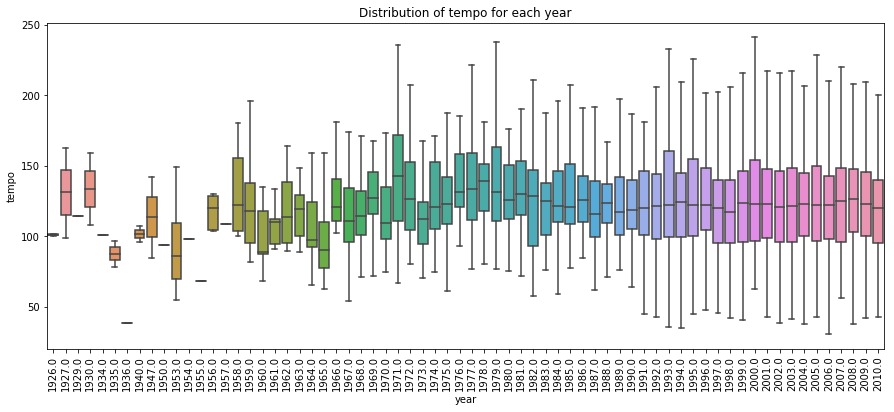

In [28]:
display_boxplot_year_no_outliers(df=df_tempo, feature='tempo')

The tempo seems to have had a small peak during the 70s before going back to normal.

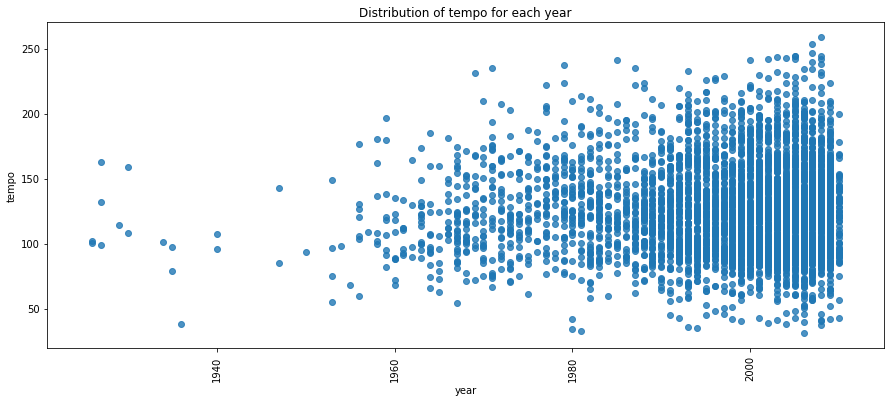

In [29]:
display_scatterplot_year(df_tempo, 'tempo')

## Song hotttnesss

In [30]:
df_hotness = extract_df_feature_year(df,'song_hotttnesss')
df_hotness.head()

,song_hotttnesss,year
4,0.604501,2007.0
8,0.265861,1984.0
15,0.405116,1987.0
18,0.684136,2004.0
23,0.666528,2004.0


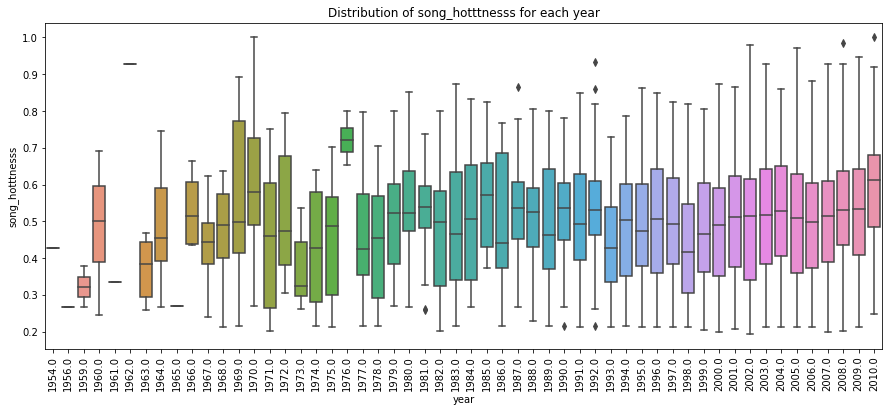

In [31]:
display_boxplot_year(df_hotness, 'song_hotttnesss')

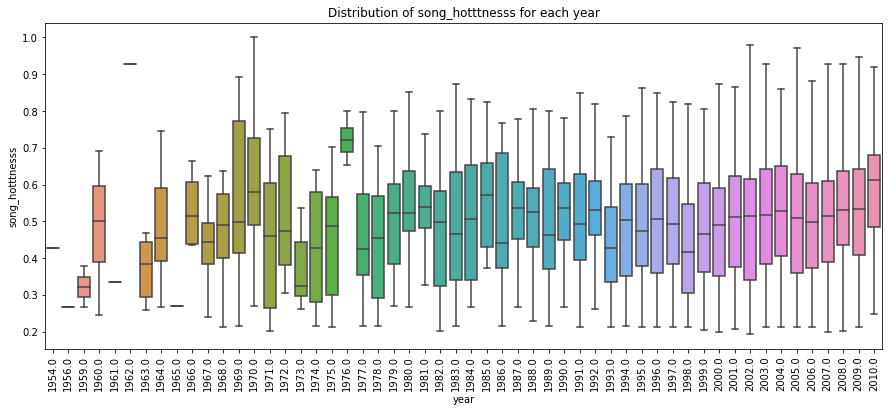

In [32]:
display_boxplot_year_no_outliers(df_hotness, 'song_hotttnesss')

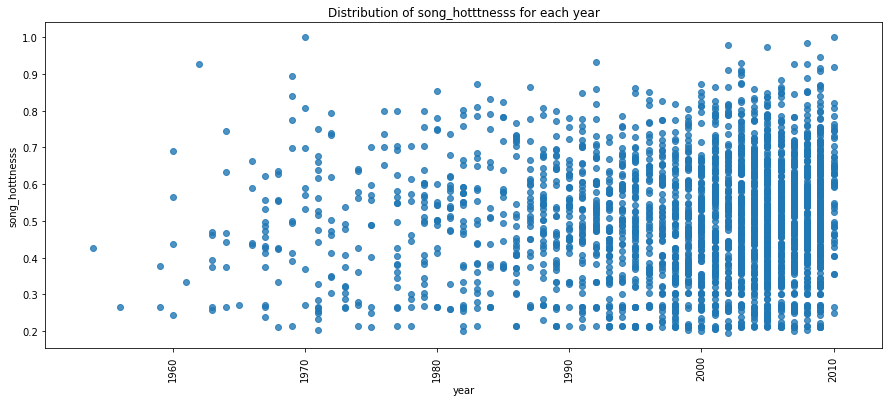

In [33]:
display_scatterplot_year(df_hotness, 'song_hotttnesss')

As the song_hotttnesss was defined when the dataset was created, it's normal that the most recent songs are more trendy, but what is interesting is that there seems to be someting going on around the 70s


# Correlations 


We want to observe the correlations between features. 

In [34]:
def extract_df_2_features(df,feat1, feat2):
    df_result = df[[feat1, feat2]][(df[feat2] != 0.0) & (df[feat1] != 0.0) & (df[feat1].notnull()) & (df[feat2].notnull())]
    return df_result

def display_scatterplot_features(df,feat1,feat2):
# create scatterplot on the year axes according to one feature
    plt.subplots(figsize=(15,6))
#     points = plt.scatter(df[feat1], df[feat2],c=df['song_hotttnesss'], cmap="BuGn")
    points = plt.scatter(df[feat1], df[feat2],color="#bcbddc")
    bplot = sns.regplot(x=feat1, y=feat2, data=df,color="#756bb1", scatter=False)
    plt.xticks(rotation=90)
    plt.title('Distribution of '+feat1 + ' against ' + feat2)
    plt.show()

In [35]:
correlation_first = ['danceability', 'duration', 'energy', 'loudness', 'tempo', 'song_hotttnesss','artist_familiarity',
              'artist_hotttnesss']

Again we want to remove the features for which we have no data :

In [36]:
correlation_analyze = []
for feat in correlation_first:
    if(df[feat][(df[feat] != 0) & (df[feat].notnull())].empty):
        print("no data for ", feat)
    else:
        correlation_analyze.append(feat)
        
print("\n\n" + 100*"*")
print("to analyze, new list : ")
print("\n")
printList(correlation_analyze)

no data for  danceability
no data for  energy


****************************************************************************************************
to analyze, new list : 


duration
loudness
tempo
song_hotttnesss
artist_familiarity
artist_hotttnesss


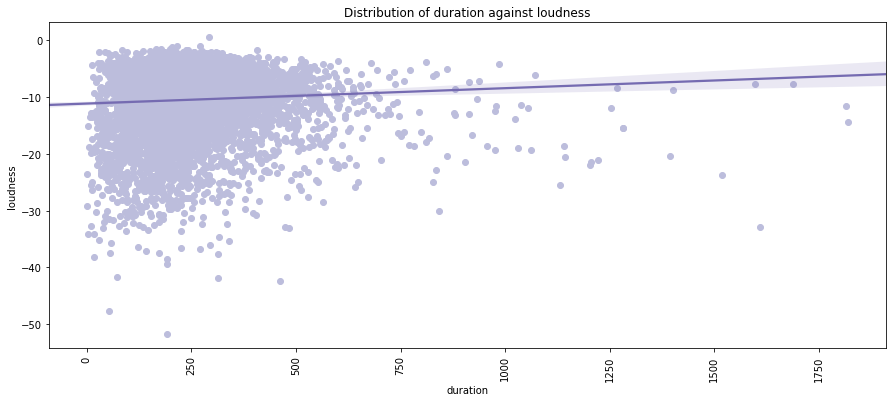

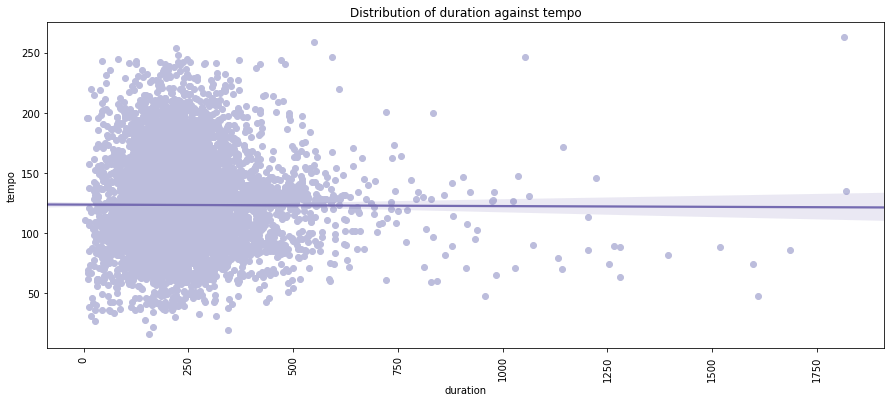

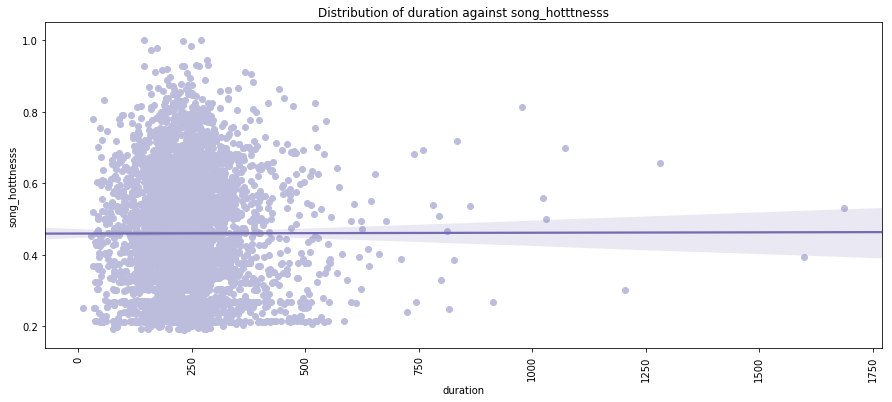

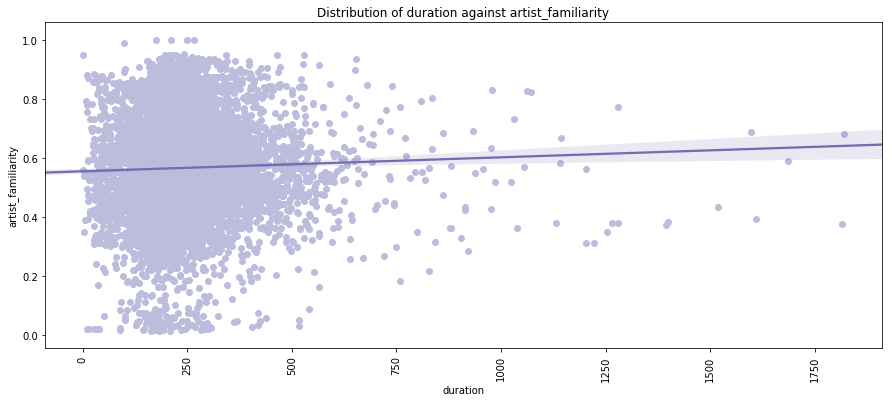

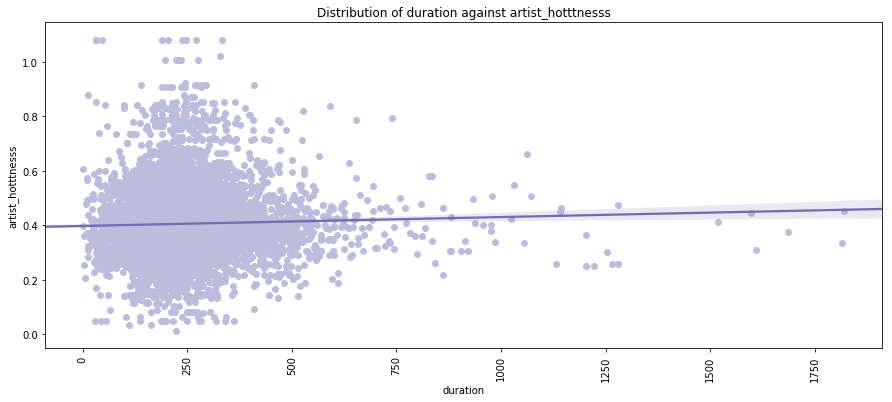

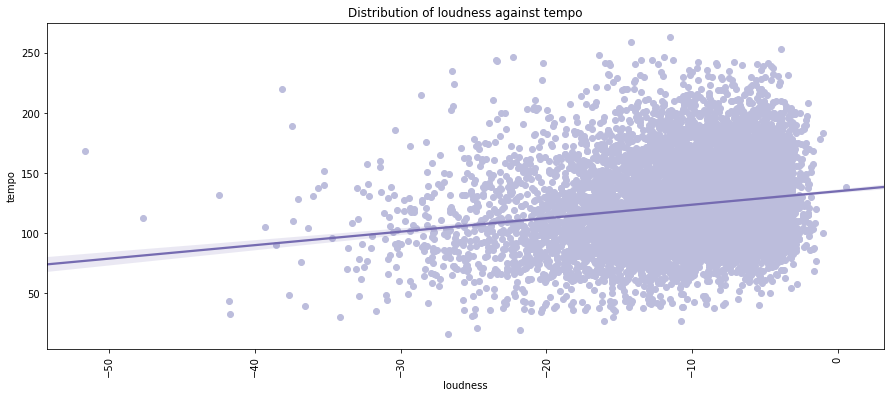

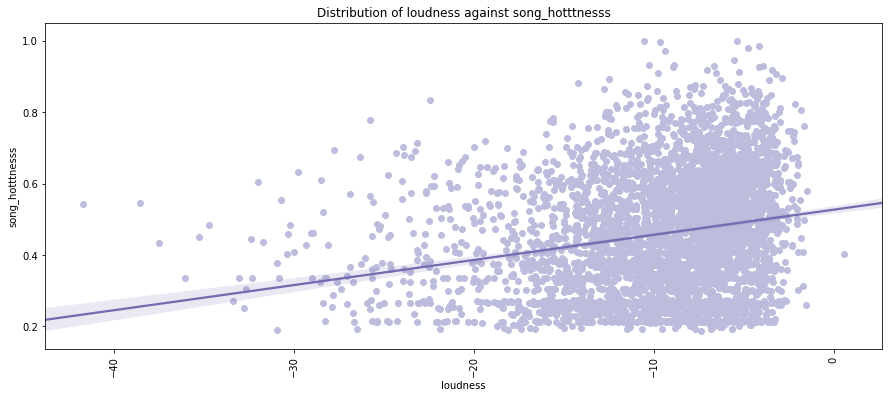

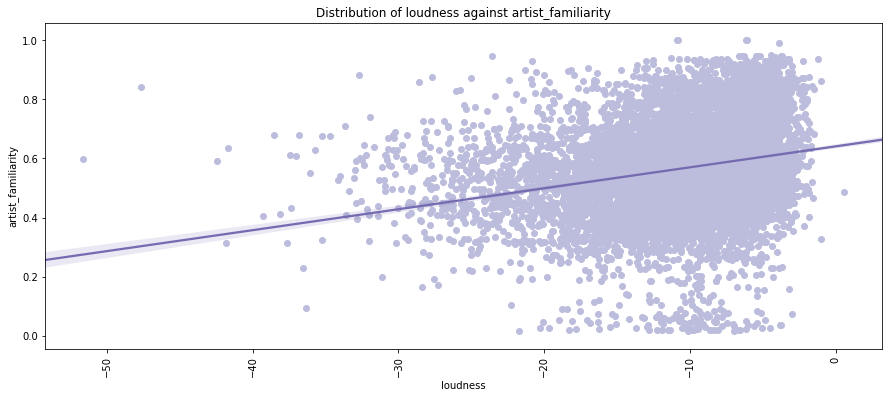

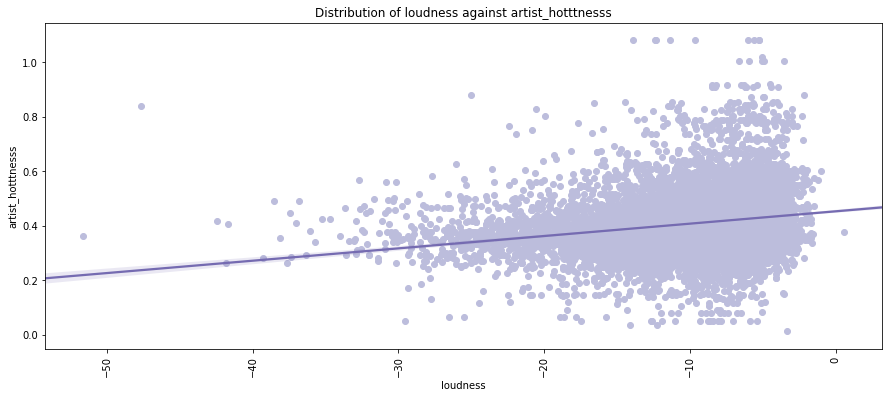

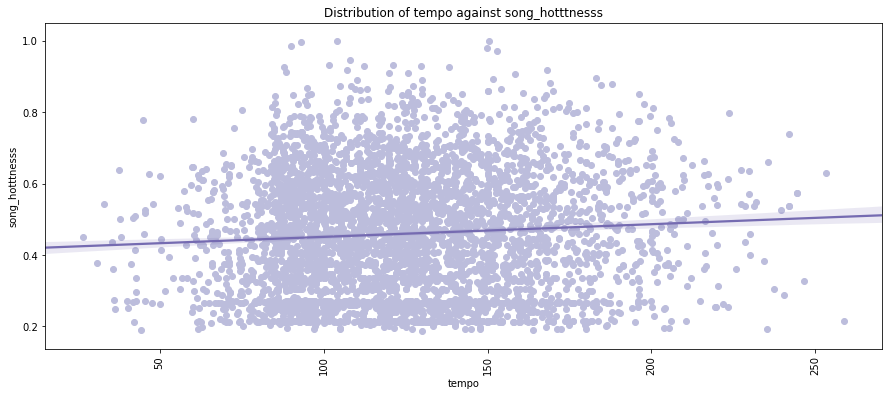

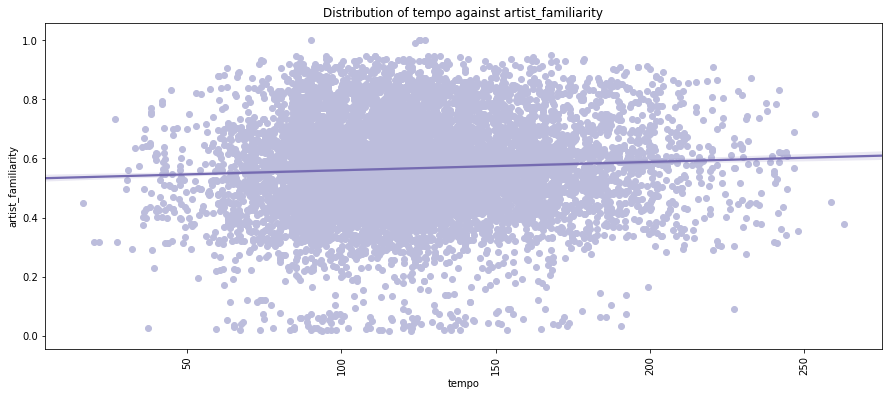

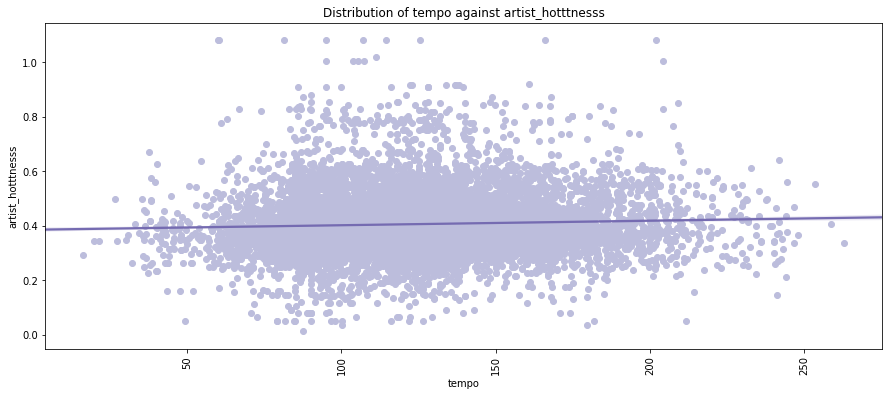

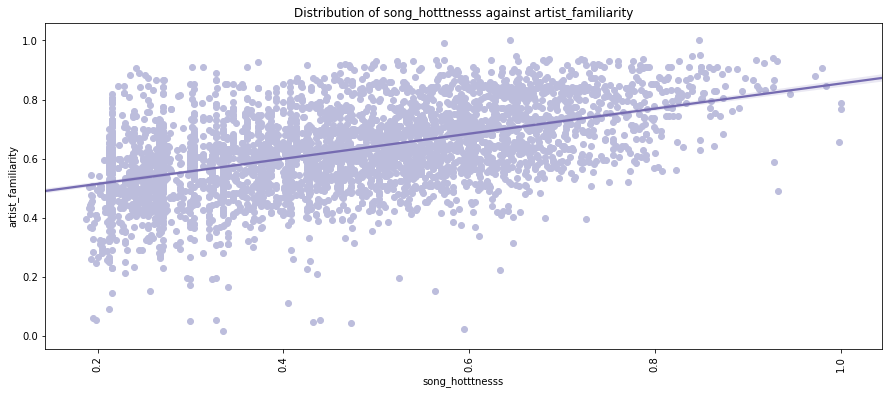

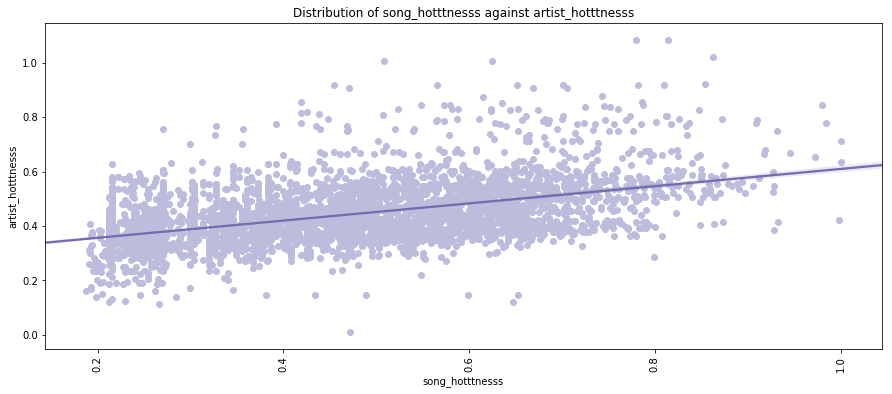

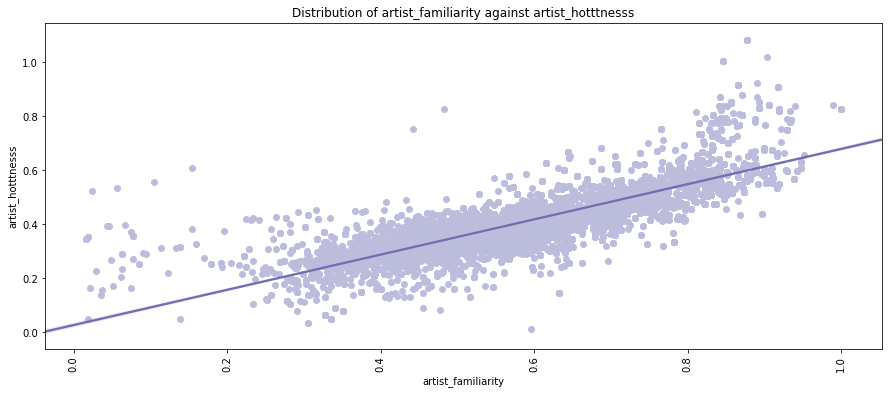

In [37]:
for i in range(0,len(correlation_analyze)):
    feat1 = correlation_analyze[i]
    for feat2 in correlation_analyze[i+1:]:
        if(feat2 not in feat1):
            # Extract features from dataframe where not null 
            df_analyze = extract_df_2_features(df,feat1,feat2)
            if(not df_analyze.empty):
                display_scatterplot_features(df_analyze, feat1, feat2)
            
 

The most striking correlation that we observe is between the artist_familiarity, the song_hotttnesss and the artist_hotttnesss which appear strongly correlated.  

It can be understood as a popular artist is most of the time popular by the songs he produces. 


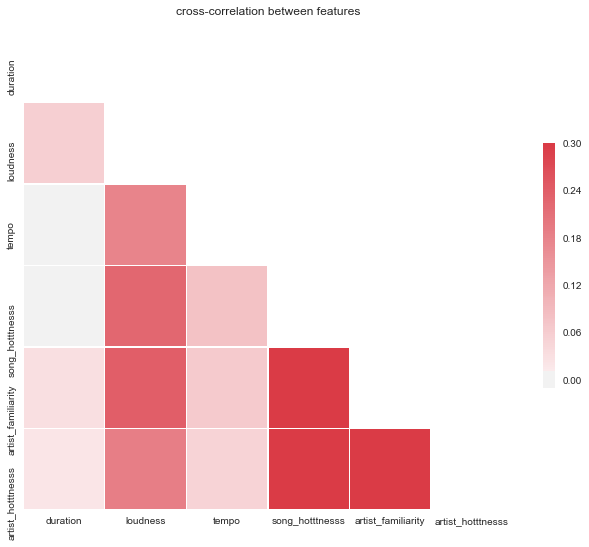

In [38]:
sns.set(style="white")

# Compute the correlation matrix
corr = df[correlation_analyze].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('cross-correlation between features')
plt.show()

# Distribution of keys accross years 


[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]


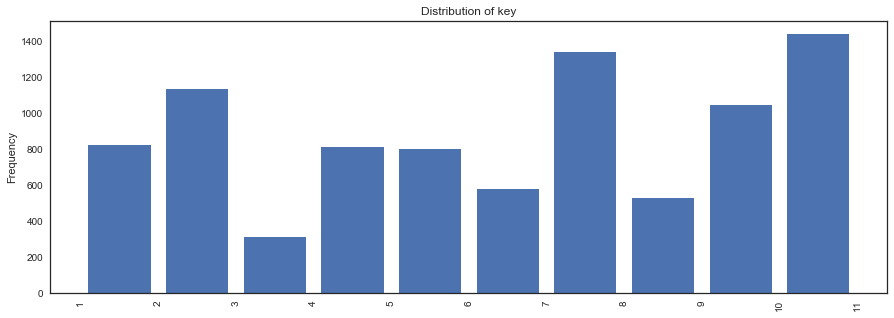

In [39]:
def plot_dist_feat(dframe,feat="key", unique_val=10):
    # Create figure and plot dataframe distribution without dist fitting
    fig,ax = plt.subplots(figsize=(15,5))
    dframe.plot.hist(by=feat,bins = unique_val, rwidth=0.8)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.xaxis.set_ticks(unique_val)
    plt.xticks(rotation=90)
    plt.title('Distribution of ' + feat)

#remove zero values for year 
df_key = df['key'][df['key'] != 0]

#unique year values sorted: 
nb_key = sorted(df_key.unique())
print(nb_key)
plot_dist_feat(df_key,'key', unique_val = nb_key)

# Extract for tens of year 
nb_year_tens = range(1920,2020,10)

# print(list(nb_year_tens))

# Plot distributions of songs for tens of years 


In [40]:
df_key_year = extract_df_feature_year(df, 'key')
df_key_year.head()

,key,year
1,6.0,1969.0
4,2.0,2007.0
8,4.0,1984.0
14,3.0,1986.0
15,7.0,1987.0


In [41]:
year_list = sorted(df_key_year['year'].unique())
key_list = sorted(df_key_year['key'].unique())
stacked_key = {}
year_list
for year in year_list:
    df_key_year_redy = df_key_year[df_key_year['year'] == year]
    key_count_list = []
    for key in key_list:
        df_key_year_redy_redk = df_key_year_redy[df_key_year_redy['key'] == key]
        key_count_list.append(len(df_key_year_redy_redk))
    stacked_key[str(year)] = key_count_list
# stacked_key

In [42]:
year_list = sorted(df_key_year['year'].unique())
key_list = sorted(df_key_year['key'].unique())
stacked_year = {}
year_list
for key in key_list:
    df_key_year_redk = df_key_year[df_key_year['key'] == key]
    year_count_list = []
    for year in year_list:
        df_key_year_redk_redy = df_key_year_redk[df_key_year_redk['year'] == year]
#         Not normalized
        year_count_list.append(len(df_key_year_redk_redy))
        #Normalized
        #year_count_list.append(len(df_key_year_redk_redy)/len(df_key_year[df_key_year['year'] == year]))
    stacked_year[str(key)] = year_count_list
# stacked_year

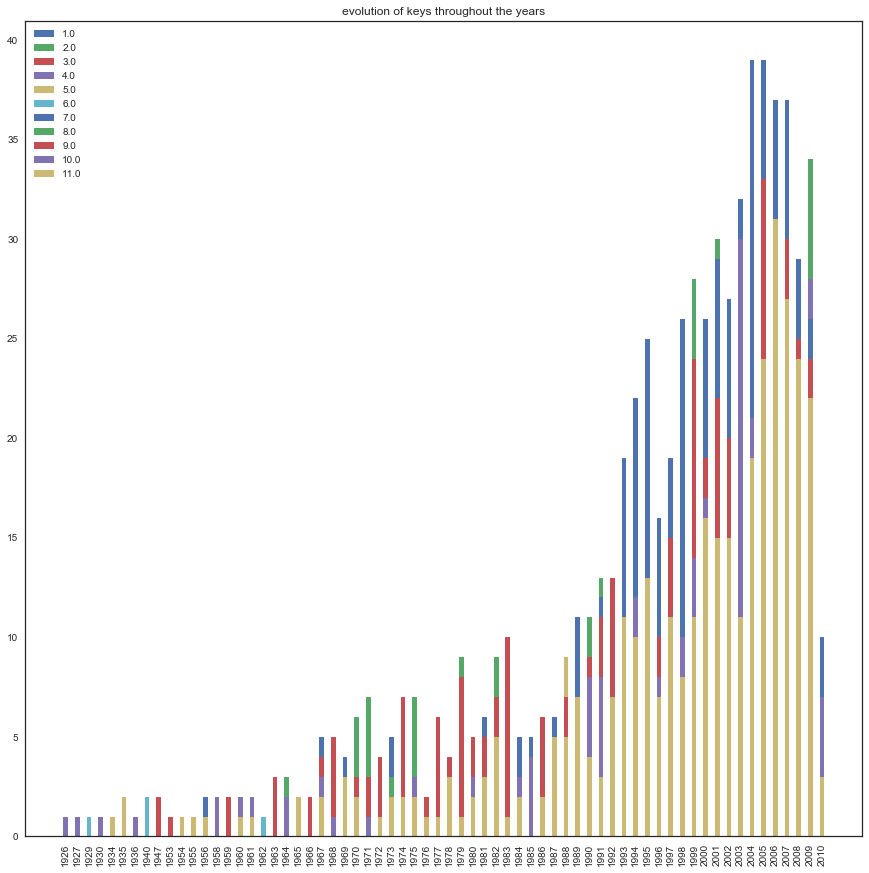

In [43]:
ind = np.arange(len(year_list))
year_list_int = [int(x) for x in year_list]
plt.subplots(figsize=(15,15))
width = 0.4
for key in key_list:
    plt.bar(ind, stacked_year[str(key)], width)
plt.xticks(ind,year_list_int)
plt.xticks(rotation=90)
plt.legend(key_list)
plt.title('evolution of keys throughout the years')
plt.show()



We see that the predominant key in songs is 1.0, but 7.0 has grown significantly starting the 1990s. 
9.0 is also present and was the dominant one before the 90s.

# Possible further analysis : 

- proportion of timbers 
- Get distribution of timbres against years 
- Evolution of correlation through time 
- correlation between tags and danceability ? 

# Tags-Analysis

Let us now study in more details the tags of the songs

Let's observe the number of tags on average of a song

In [44]:
length_of_tags = df['artist_terms'].apply(lambda tags:len(eval(tags)))
length_of_tags.mean()

26.6611

Let's print the tags, sorted by frequency (only the first 20)

In [37]:
def get_tags_ordered_by_freq(tags,eval_=False):
    """
    Returns the unique tags in a dataframe and their count
    Put eval to true if the list of tags inside the dataframe is a string.
    """
    if eval_:
        flat_list = [item for sublist in tags for item in eval(sublist)]
    else:
        flat_list = [item for sublist in tags for item in sublist]
    tag_unique,count=(np.unique(flat_list,return_counts=True))
    return sorted(zip(tag_unique,count), key=lambda pair: pair[1])[::-1]
best_tags=get_tags_ordered_by_freq(list(df['artist_terms']),eval_=True)
pprint(best_tags[:20])

[('rock', 6493),
 ('pop', 5476),
 ('electronic', 4453),
 ('jazz', 3596),
 ('united states', 3084),
 ('hip hop', 2926),
 ('alternative rock', 2753),
 ('folk', 2598),
 ('alternative', 2586),
 ('soul', 2491),
 ('pop rock', 2324),
 ('blues', 2281),
 ('country', 2215),
 ('american', 2207),
 ('punk', 2182),
 ('indie', 2167),
 ('guitar', 2163),
 ('funk', 2008),
 ('classic rock', 1985),
 ('acoustic', 1942)]


Let's observe the distribution of the 20 most common tags

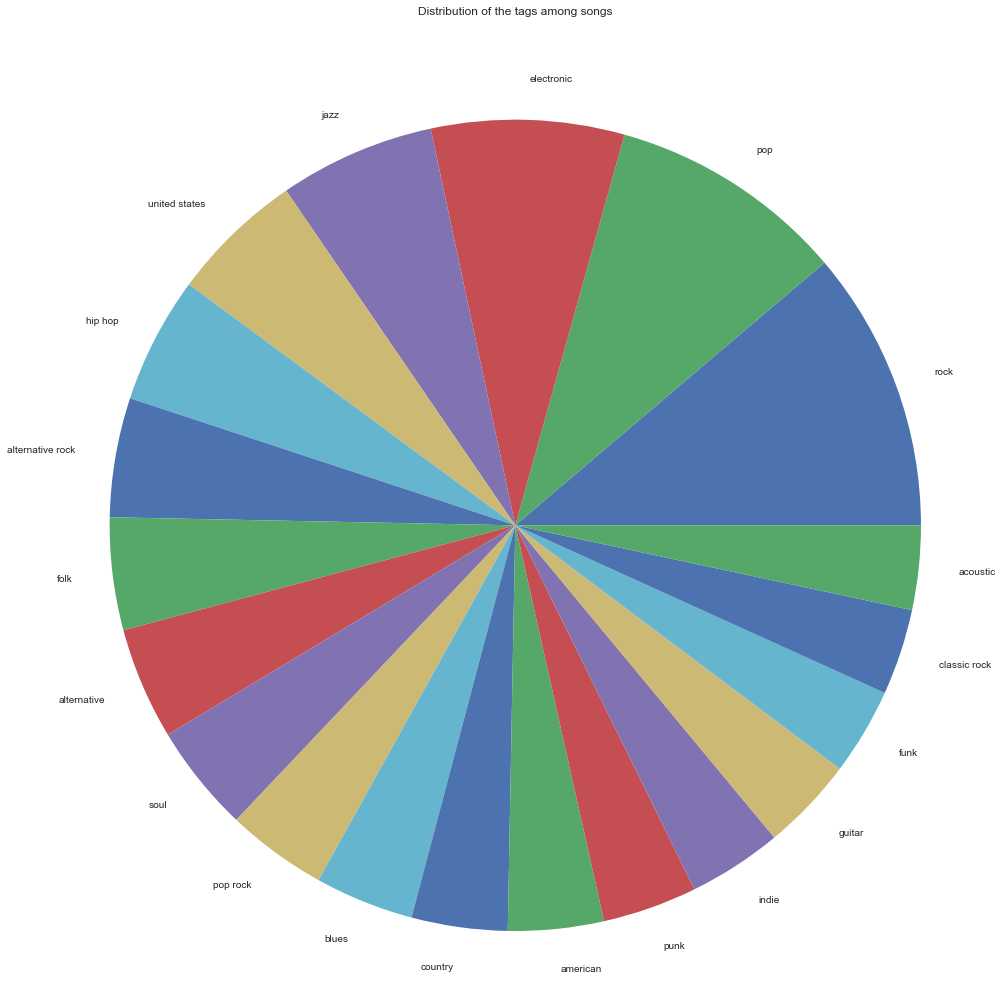

In [46]:
tags_toplot_selected=best_tags[:20]
#tags_toplot_others = best_tags[:20]
#tags_toplot_others = [c for _,c in tags_toplot_others]
#sum_others = np.sum(tags_toplot_others)
tags_toplot_selected_sizes = [c for _,c in tags_toplot_selected]
tags_toplot_selected_labels = [l for l,_ in tags_toplot_selected]
# Plotting
plt.figure(figsize=(16,16))
plt.pie(tags_toplot_selected_sizes, labels=tags_toplot_selected_labels)
plt.title('Distribution of the tags among songs',y=1.08)
plt.axis('equal')
plt.show()
plt.savefig('figs/most commong tags piechart.png')

As we can see, Rock is the most common tag, followed by pop and electronic.

Let's observe the evolution of the 5 most common tags throughout time

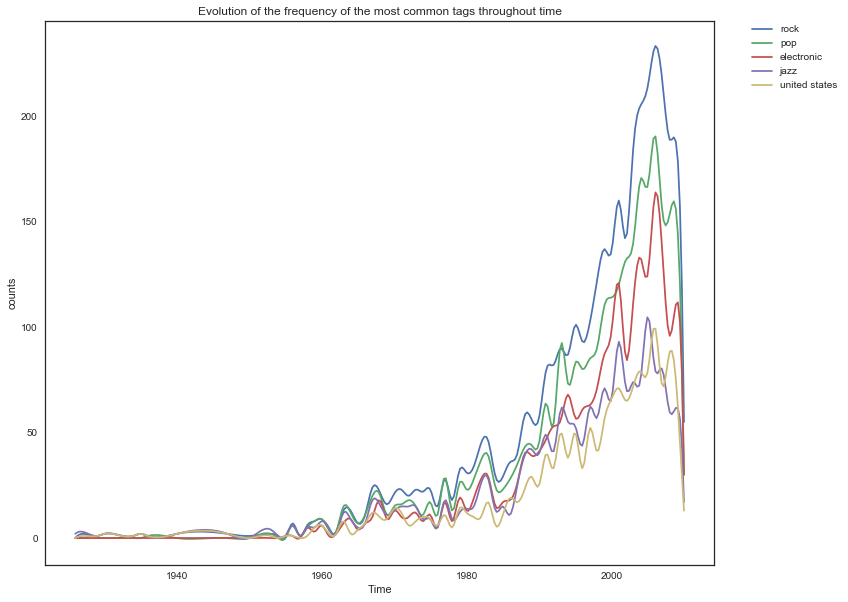

In [47]:
# Let's look at the data that is timestamped
df_per_year = df[df['year']!=0]
years=np.unique(df_per_year['year'])
# Tags we will plot (top 5)
tags_to_plot=best_tags[:5]
# Number frequency of each tag per year
counts_per_tag_per_year=[]
for tag,_ in tags_to_plot:
    counts_per_year =[]
    for year in years:
        count=0
        # Get the relevant year
        df_year = df_per_year[df_per_year['year']==year]
        # Get the tags ordered by frequency of the year we are looking at
        tags_ordered_by_freq = get_tags_ordered_by_freq(df_year['artist_terms'],eval_=True)
        for i in range(len(tags_ordered_by_freq)):
            # Add to the general cound of the top 5 tags, the frequency of these tags in this year
            if tags_ordered_by_freq[i][0]==tag:
                count=tags_ordered_by_freq[i][1]
                break
        counts_per_year.append(count)
    counts_per_tag_per_year.append(counts_per_year)
counts_per_tag_per_year

# Plotting
# To smooth the curve
xnew = np.linspace(years.min(),years.max(),300) 
plt.figure(figsize=(12,10))
# For each tag to plot, we plot it
for tag_idx in range(len(tags_to_plot)):
    counts_smooth = spline(years,counts_per_tag_per_year[tag_idx],xnew)
    plt.plot(xnew,counts_smooth,label=tags_to_plot[tag_idx][0])

plt.title("Evolution of the frequency of the most common tags throughout time")
plt.xlabel('Time')
plt.ylabel('counts')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.savefig('figs/tags_plotted.png')

As we can see, the number of songs in the dataset increase as the song is more recent. As we can observe, overall, they seem to evolve at the same pace.



Let us now study each time period at a time and observe their most common tags with a stacked bar chart. To do that, since we will plot different most common tags for each time period, we need to separately build each reactangle of the plot.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


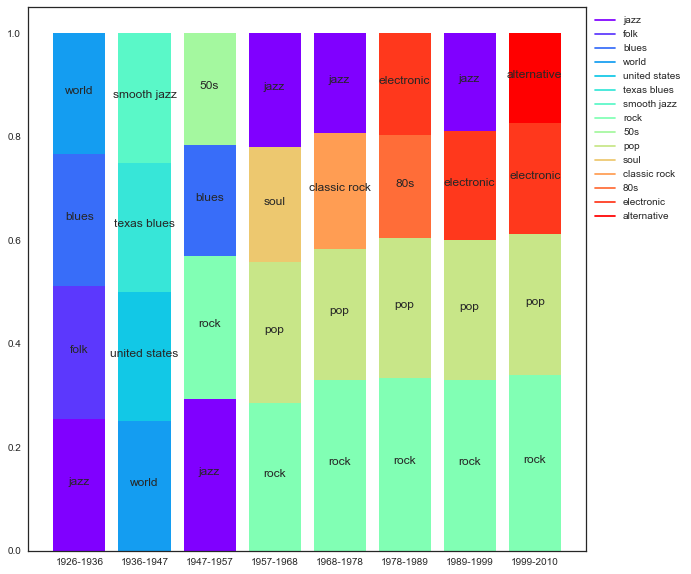

In [48]:
def get_windows_df(df_per_year,first_year,period_length,windows_number):
    """
    Split the data frame in windows_number dataframe, each corresponding to a time period
    """
    df_windows=[]
    for window_idx in range(windows_number):
        start_year = years[0]+window_idx*period_length
        end_year = start_year+period_length
        df_window = df_per_year[df_per_year['year']>= start_year ]
        df_window = df_window[df_window['year']< end_year]
        df_windows.append(df_window)
    return df_windows

# We want to study 8 time periods
windows_number = 8
# Length of a period in years
period_length = (years.max() - years.min())/windows_number
# The tags of a time period
tags_per_window=[]
#The colored assigned to a tag (one color per tag)
color_per_tag=dict()
# The colors generator
colors =iter(cm.rainbow(np.linspace(0,1,15)))
#The number of most common tags we will display per year
n_tags_to_keep=4


fig, ax = plt.subplots(figsize=(10,10))
# List of strings that represent the labels of x (the time periods)
time_periods=[str(int(years[0]+period_length*window_idx))+'-'+str(int(years[0]+(window_idx+1)*period_length)) for window_idx in range(windows_number)]

# Split the dataframe to get multiple dataframe, one for each time period
df_windows=get_windows_df(df_per_year,years[0],period_length,windows_number)

for window_idx in range(windows_number):
    df_window=df_windows[window_idx]
    # Get the most frequent tags
    most_frequent_tags = get_tags_ordered_by_freq(list(df_window['artist_terms']),eval_=True)[:n_tags_to_keep]
    tags_per_window.append(most_frequent_tags)
    
    # Normalize the counts
    counts=[]
    tags=[]
    for t,c in most_frequent_tags:
        counts.append(c)
        tags.append(t)
    normalized_counts = counts / sum(counts)
    
    # We will build a rectangle for each tag for each time period
    old_bar=[0]*windows_number
    for tag in range(0,len(tags)):
        # We create a bar that is zeros everywhere except where we want to put the rectangle.
        # (it's basically a bar plot, with a positive value only where we want a bar)
        # Since we work one time period at a time, we build one part of one bar at a time
        bar=[0]*window_idx
        bar.append(normalized_counts[tag])
        bar.extend([0]*(windows_number-1-window_idx))
        # We fetch the corresponding color for the tag
        if tags[tag] in color_per_tag.keys():
            color = color_per_tag[tags[tag]]
        else:
            color =next(colors)
            color_per_tag[tags[tag]]=color
        # We plot a part of the bar.
        # With an offset of the other parts of the current time period we have already displayed
        bar_plt = ax.bar(time_periods,bar,bottom=old_bar,color=color)
        # We add the text
        for rect in bar_plt:
            if rect.get_height()!=0:
                ax.text(rect.get_x() + rect.get_width()/2., rect.get_y()+rect.get_height()/2, tags[tag],ha='center')
        old_bar=np.array(bar)+np.array(old_bar)        
# We build the legend
for tag,color in color_per_tag.items():
    ax.plot([],[],label=tag,color=color)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    
fig.show()  
fig.savefig('figs/tags stacked bar.png')

As we can see the music tags have evolved through time. With songs in fol,jazz,blues in the 30s, we now have today music in rock, pop, electronic and alternative

### Maps  of tags

We will display the map of the different kind of music all over the world

Let us first get the country of each artists from the longitude and latitude. Instead of looking up the location of the artist of the location, we will only lookup once per artist.

In [49]:
# We first get the location of each artist
df_artists_location=pd.read_csv("data/MillionSongSubset/AdditionalFiles/subset_artist_location.txt" , 
                                sep="<SEP>", header=None, names=['AR','lat','long','TRA',"artist"])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


In [51]:


def getplace(lat, lon):
    """
    Return the country, given latitude and longitude
    """
    url = "http://maps.googleapis.com/maps/api/geocode/json?"
    url += "latlng=%s,%s&sensor=false" % (lat, lon)
    components=None
    while(components==None):
        try:
            v = urlopen(url).read()
            j = json.loads(v) 
            components = j['results'][0]['address_components']
        except IndexError:
            print(lat,long)
            print("Retrying",j['status'])
            if j['status']=='ZERO_RESULTS':
                print("Doesn't exist...skipping...")
                return None
            time.sleep(0.5)
            continue
        except HTTPError:
            continue
    country = town = None
    for c in components:
        if "country" in c['types']:
            country = c['long_name']
        if "postal_town" in c['types']:
            town = c['long_name']
    return country
def map_of_tag_csv():
    # We find the country for each song
    df_artists_location['country']=[None]*df_artists_location.shape[0]
    for i in range(0,df_artists_location.shape[0]):
        lat=df_artists_location.loc[i,'lat']
        long=df_artists_location.loc[i,'long']
        print("N:",i,"/",df_artists_location.shape[0])
        place=getplace(lat,long)
        print(place)
        df_artists_location.loc[i,'country']=place

    df_artists_location.to_csv('data/df_artists_location.csv',encoding='utf-8')

In [52]:
df_artists_location=pd.read_csv('data/df_artists_location.csv',encoding='utf-8')

We display the repartition of songs' origin in the dataset over the world 

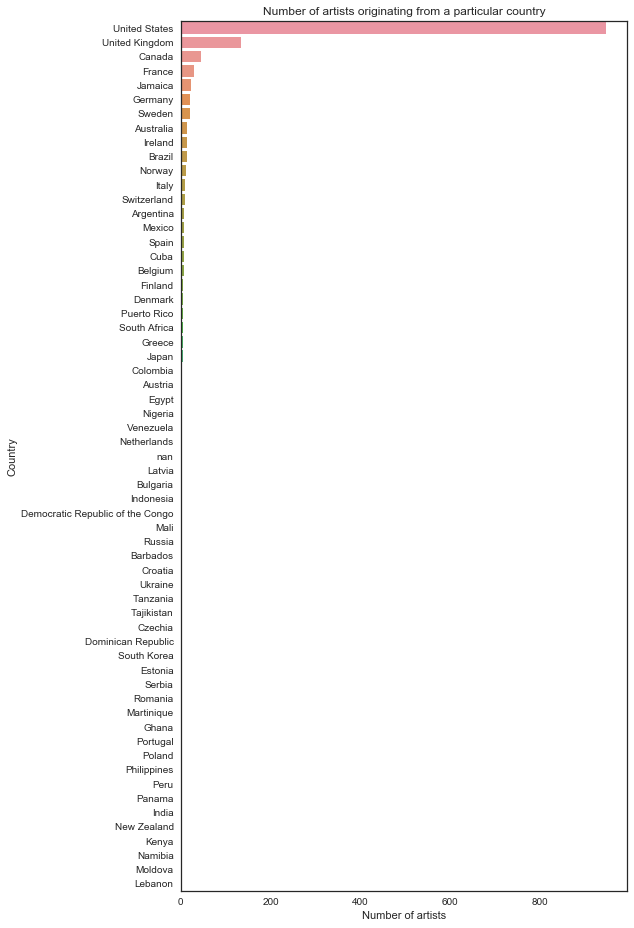

In [53]:
# Find the unique countries who are not none
countries_wo_None = [item for item in df_artists_location['country'] if item is not None]
uniq=np.unique(countries_wo_None,return_counts = True)
unique=np.array([uniq[0],uniq[1]]).T


df_country_count=pd.DataFrame(unique,columns=['Country','Count'])
df_country_count['Count']=df_country_count['Count'].astype('int64')
df_country_count=df_country_count.sort_values(by='Count',ascending=False)

f, ax = plt.subplots(1, 1,figsize=(8,16))
sns.barplot(y=df_country_count['Country'],x=df_country_count['Count'],ax=ax)
ax.set_title("Number of artists originating from a particular country")
ax.set_xlabel("Number of artists")
ax.set_ylabel("Country")
plt.show()
f.savefig("figs/musics per countries (subset).png")

In [57]:
# We merge this country information with the original dataset
df_to_merge=df_artists_location.loc[:,['AR','country']]
df_with_location = df.merge(df_to_merge,how='left',left_on='artist_id',right_on='AR').drop('AR',axis=1)
df_with_location.head()

,track_id,title,song_id,artist_mbid,artist_id,artist_name,artist_familiarity,artist_similarity,artist_latitude,artist_longitude,...,artist_hotttnesss,danceability,energy,duration,key,loudness,song_hotttnesss,tempo,year,country
0,TRAAAAW128F429D538,I Didn't Mean To,SOMZWCG12A8C13C480,e77e51a5-4761-45b3-9847-2051f811e366,ARD7TVE1187B99BFB1,Casual,0.581794,"['ARV4KO21187FB38008', 'ARWHM281187FB3D381', '...",NaN,NaN,...,0.401998,0.0,0.0,218.93179,1.0,-11.197,0.602120,92.198,0.0,NaN
1,TRAAABD128F429CF47,Soul Deep,SOCIWDW12A8C13D406,1c78ab62-db33-4433-8d0b-7c8dcf1849c2,ARMJAGH1187FB546F3,The Box Tops,0.630630,"['ARSZWK21187B9B26D7', 'ARLDW2Y1187B9B544F', '...",35.14968,-90.04892,...,0.417500,0.0,0.0,148.03546,6.0,-9.843,NaN,121.274,1969.0,United States
2,TRAAADZ128F9348C2E,Amor De Cabaret,SOXVLOJ12AB0189215,7a273984-edd9-4451-9c4d-39b38f05ebcd,ARKRRTF1187B9984DA,Sonora Santanera,0.487357,"['ARFSJUG11C8A421AAD', 'AR8SD041187FB36015', '...",NaN,NaN,...,0.343428,0.0,0.0,177.47546,8.0,-9.689,NaN,100.070,0.0,NaN
3,TRAAAEF128F4273421,Something Girls,SONHOTT12A8C13493C,e188a520-9cb7-4f73-a3d7-2f70c6538e92,AR7G5I41187FB4CE6C,Adam Ant,0.630382,"['AR4R0741187FB39AF2', 'AR0D7K21187B9AD14E', '...",NaN,NaN,...,0.454231,0.0,0.0,233.40363,0.0,-9.013,NaN,119.293,1982.0,NaN
4,TRAAAFD128F92F423A,Face the Ashes,SOFSOCN12A8C143F5D,c6903a2e-063c-4f91-a284-17b8f421be7b,ARXR32B1187FB57099,Gob,0.651046,"['ARUA62A1187B99D9B0', 'ARHJFFY1187B98BA76', '...",NaN,NaN,...,0.401724,0.0,0.0,209.60608,2.0,-4.501,0.604501,129.738,2007.0,NaN


We now display a map where each country is colored by the tag most common in its songs

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


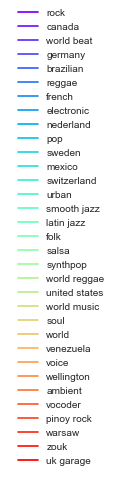

In [58]:
def create_map_tags_from_df(df_with_location):
    """
    Create a map from the dataframe coloring each country with the color of its most proeminent tag
    """
    best_tag_per_country = dict()
    color_per_country = dict()
    color_per_tag=dict()
    most_frequent_tags=[]
    
    # We will look at the songs which have a location
    countries=pd.unique(df_with_location['country'].dropna())
    for country in countries:
        df_country = df_with_location[df_with_location['country'] == country]
        # Get the most frequent tag
        most_frequent_tag,_=get_tags_ordered_by_freq(list(df_country['artist_terms']),eval_=True)[0]
        best_tag_per_country[country] = most_frequent_tag
        most_frequent_tags.append(most_frequent_tag)
    # Create the color generator
    colors =iter(cm.rainbow(np.linspace(0,1,np.unique(most_frequent_tags).shape[0])))
    # for each country, assigne its color based on its most common tag
    for country in countries:
        most_frequent_tag = best_tag_per_country[country]
        if not (most_frequent_tag in color_per_tag.keys()):
            color_per_tag[most_frequent_tag]=next(colors)
        color_per_country[country]=color_per_tag[most_frequent_tag]

    def RGBA_to_hex(argb):
        """
        function that translates RGBA to hex which is used in folium
        """
        hex_='#'
        for i in argb:
            hex_+=str(hex(int(i*255)).split('x')[-1].zfill(2))
        return hex_

    def style_function(feature, color_per_country_):
        """
        Style function for folium
        """
        key= feature['properties']['name']
        if key not in color_per_country_:
            fillcolor='#white'
        else:
            fillcolor=RGBA_to_hex(color_per_country_[key])
        return {'color':fillcolor}

    style_function_preped=partial(style_function,color_per_country_=color_per_country)

    # Load the geojson delimiting the countries
    countries_geo_path = 'data/world-countries.json'
    geo_json_data = folium.GeoJson(countries_geo_path,style_function=style_function_preped)
    Lausanne = [46.519962, 6.633597]
    world_map = folium.Map(location = Lausanne, tiles='cartodbpositron',zoom_start=2)
    geo_json_data.add_to(world_map)

    # Create a legend
    legend, ax = plt.subplots(figsize=(1,1))
    for tag_idx,tag in enumerate(color_per_tag):
        ax.plot([],[],color=color_per_tag[tag],label=tag)
    legend.legend()
    ax.axis('off')
    return world_map,legend

world_map, legend = create_map_tags_from_df(df_with_location)
legend.savefig("figs/legend_overall_map")
legend.show()
urlsave="./html/world_map_tags.html"
world_map.save(urlsave)
displaymap(urlsave)

We here have a map showing the most proeminent tags in each country. For example most of the songs from Switzerland have the tag french.

We will now look at how the maps looked like through out time:

1926-1954

1926-1954


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


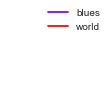

In [59]:
windows_number = 3
period_length = (years.max() - years.min())/windows_number
df_windows = get_windows_df(df_with_location, years[0],period_length,windows_number)
labels=[str(int(years[0]+period_length*window_idx))+'-'+str(int(years[0]+(window_idx+1)*period_length)) for window_idx in range(windows_number)]

print(labels[0])
world_map, legend = create_map_tags_from_df(df_windows[0])
legend.savefig("figs/legend_1926-1954.png")
legend.show()
urlsave="./html/world_map_tags_1926-1954.html"
world_map.save(urlsave)
displaymap(urlsave)

As we can see, we don't have a lot of songs so it's difficult to build a precise map

1954-1982

1954-1982


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


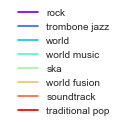

In [60]:
print(labels[1])
world_map, legend = create_map_tags_from_df(df_windows[1])
legend.savefig("figs/legend_1954-1982.png")
legend.show()
urlsave="./html/world_map_tags_1954-1982.html"
world_map.save(urlsave)
displaymap(urlsave)

Here we have more data, so it makes more sense

1982-2010

1982-2010


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


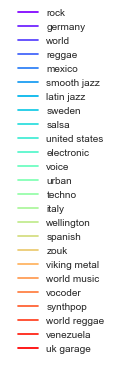

In [61]:
print(labels[2])
world_map, legend = create_map_tags_from_df(df_windows[2])
legend.savefig("figs/legend_1982-2010.png")
legend.show()
urlsave="./html/world_map_tags_1982-2010.html"
world_map.save(urlsave)
displaymap(urlsave)

Here we can clearly see a lot more countries because most of the songs in the dataset are recent

As we have seen, the popularity of tags evolved through time. We started with some blues and we are now listening to electronic music. We also that there is a lot of different ways kinds of music that are listened throughout the world.

It could be interesting to keep moving in this direction and maybe, with more data, we can fill more countries which could provide us with more insight.  
We plan on building a map that goes through time displaying the most popular tags in each country through time

# Artists-Analysis

In this section we will analyze artists over time, who are the hottest, the most familiar and those with the most influence. We will go through the following steps:

 - Analysis of *hotttnesss* vs *familiarity*
 - National artist hotness
 - Artist Similarity

## Analysis of *hotttnesss* vs *similarity*

First we would like to see how the hottness of artists evolves through time. 
> Note: We need to define what is hotness and familiarity
- According to [blog.echonest.com](blog.echonest.com), the buzz-measuring "hotttnesss" is telling "which songs are getting the most buzz – not just how they’re charting, or how many times they’ve been played, but how much people all over the world are talking about and sharing them.". It is very important to note that this buzz-metric has been calculated in **2010** so we do not necessarly have the information during the artist period. Hence this metric tells how people was seeing the artist in 2010.
  
We need to clean the data because there are a lot of artists with not *hotttnesss* and *year*. 

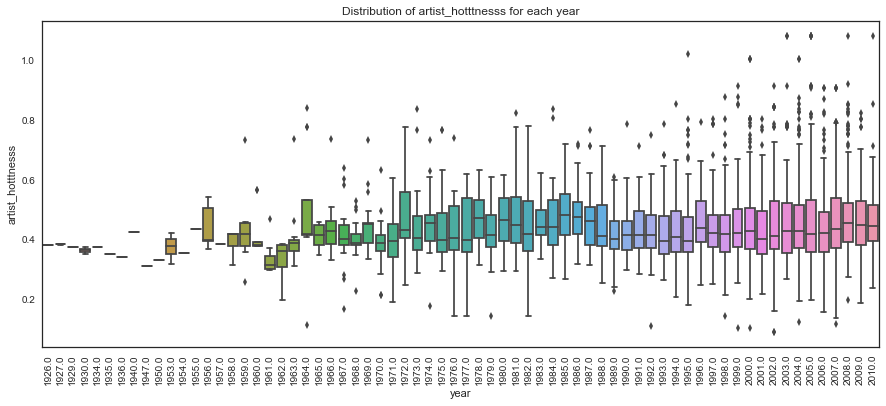

In [62]:
# Cleaning zeros in the data
df_nz = df[df['year'] != 0]
df_nz_hot = df_nz[df_nz['artist_hotttnesss'] != 0]
df_nz_fam = df_nz[df_nz['artist_familiarity'] != 0]

# Display the artist hotttnesss
display_boxplot_year(df=df_nz_hot, feature='artist_hotttnesss')

We do the same for the artist familiarity.
> Familiarity is also a measure from Echo Nest. It indicates how well known an artist is.

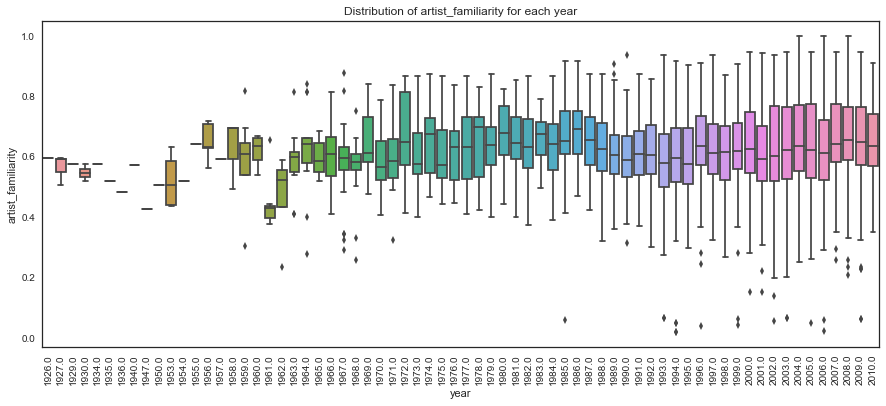

In [63]:
display_boxplot_year(df=df_nz_fam, feature='artist_familiarity')

We observe a correlation between the two features, they were overall indeed higher in the 80's and in the 21st century. This is however not obvious. We note a growth in the range of the distribution of both *hotttnesss* and *familiarity*.

### Who are the artists making the 'buzz' and the well known ones?

As the difference between those two features is not obvious, we will look at the top 10 artists with highest *hotttnesss* and *familiarity* across all years.

In [64]:
# Display the top 10 'hot' artists
df.sort_values(by='artist_hotttnesss', ascending=False).ix[:,['artist_name', 'artist_hotttnesss']] \
    .drop_duplicates(subset='artist_hotttnesss')[:10]

,artist_name,artist_hotttnesss
8464,Kanye West,1.082503
4950,Daft Punk,1.021256
8123,Black Eyed Peas,1.005942
3886,Taylor Swift,0.922412
1972,Coldplay,0.916053
4219,Rihanna,0.908203
4014,Eminem,0.879237
9438,T.I.,0.872839
3326,Taylor Swift,0.872447
2873,Usher,0.854638


> Note: The three first artists have an *hotttnesss* score higher than 1 in contradiction as stated in the [description](https://labrosa.ee.columbia.edu/millionsong/pages/example-track-description) of the data. One hypothesis is that it comes from the featurings but since it does not affect our results we will not touch it.

In [65]:
# Display the top 10 'familiar' artists
df.sort_values(by='artist_familiarity', ascending=False).ix[:,['artist_name', 'artist_familiarity']]\
    .drop_duplicates(subset='artist_familiarity')[:10]

,artist_name,artist_familiarity
7403,Akon,1.000000
9236,Lil Wayne,0.989939
5317,Paramore,0.951488
1237,Britney Spears,0.947328
1160,Avril Lavigne,0.941896
7581,Lady GaGa,0.939227
1917,Fall Out Boy,0.937965
8753,Mariah Carey,0.934935
9370,Alicia Keys,0.933916
6059,Muse,0.929030


From this two top 10, we can see that no artist is in both list. This shows that an artist that is well known is not necessarly doing a 'buzz'. We have to keep in mind that those two rankings are coming from 2010.

### Who are the hottest artists accross the years?

We will now focus on the top artists through years.

In [66]:
# Fetch the hottest artists in a dataframe
df_hottest_year = df_nz.sort_values(by=['year', 'artist_hotttnesss'], ascending=[True, False]) \
    .ix[:, ['year','artist_name', 'artist_hotttnesss']].drop_duplicates(subset='year')

# Fetch the most familiar artists in a dataframe
df_fam_year = df_nz.sort_values(by=['year', 'artist_familiarity'], ascending=[True, False]) \
    .ix[:, ['year','artist_name', 'artist_familiarity']].drop_duplicates(subset='year')

df_year = df_hottest_year.merge(df_fam_year, on='year')
df_year.head(10)

,year,artist_name_x,artist_hotttnesss,artist_name_y,artist_familiarity
0,1926.0,Blind Lemon Jefferson,0.382847,Blind Lemon Jefferson,0.594867
1,1927.0,Ma Rainey,0.385568,Blind Lemon Jefferson,0.594867
2,1929.0,Charley Patton,0.375594,Charley Patton,0.574300
3,1930.0,Charley Patton,0.375594,Charley Patton,0.574300
4,1934.0,Charlie Patton,0.375594,Charlie Patton,0.574300
5,1935.0,Sleepy John Estes,0.353036,Sleepy John Estes,0.519000
6,1936.0,Red Foley,0.342627,Red Foley,0.481704
7,1940.0,Bukka White,0.424488,Bukka White,0.572471
8,1947.0,Tex Williams,0.313648,Tex Williams,0.425883
9,1950.0,Percy Mayfield,0.333723,Percy Mayfield,0.505074


In [67]:
df_year.tail(10)

,year,artist_name_x,artist_hotttnesss,artist_name_y,artist_familiarity
58,2001.0,Shakira,0.804220,Avril Lavigne,0.941896
59,2002.0,Coldplay,0.916053,Mariah Carey,0.934935
60,2003.0,Kanye West,1.082503,Britney Spears,0.947328
61,2004.0,Black Eyed Peas,1.005942,Akon,1.000000
62,2005.0,Kanye West / Adam Levine,1.082503,Britney Spears,0.947328
63,2006.0,Rihanna,0.908203,Akon,1.000000
64,2007.0,Rihanna,0.908203,Britney Spears,0.947328
65,2008.0,Kanye West,1.082503,Akon,1.000000
66,2009.0,U2,0.825639,Britney Spears,0.947328
67,2010.0,Kanye West / Lupe Fiasco,1.082503,Daddy Yankee,0.908984


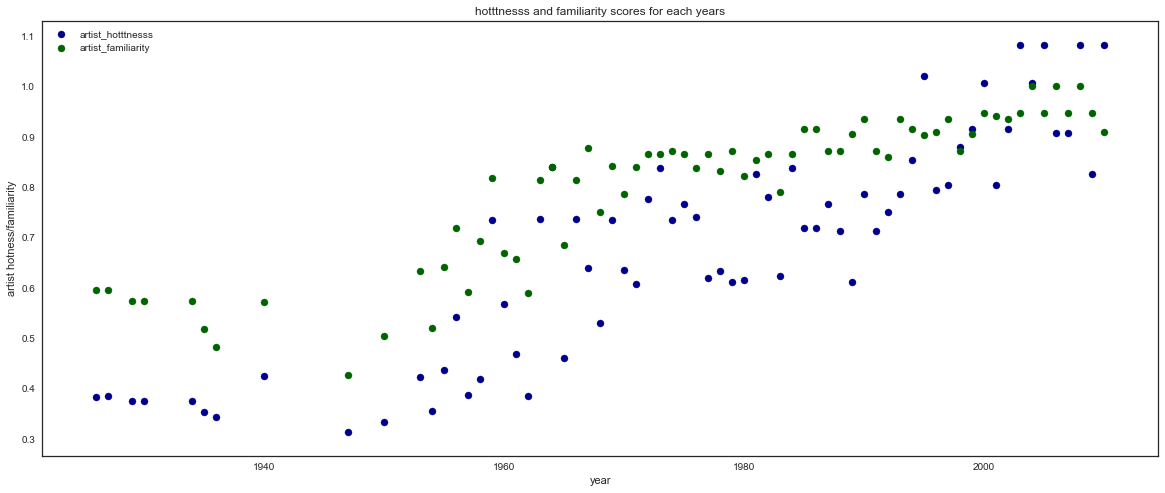

In [68]:
# Plot the hottest and most familiar artists
fig, ax = plt.subplots(figsize=(20,8))
df_hottest_year.plot('year', 'artist_hotttnesss', kind='scatter', s=50, ax=ax, label='artist_hotttnesss', color='DarkBlue')
df_fam_year.plot('year', 'artist_familiarity', kind='scatter', s=50, ax=ax, label='artist_familiarity', color='DarkGreen')
plt.ylabel('artist hotness/familiarity')
plt.title('hotttnesss and familiarity scores for each years')
plt.savefig('./figs/hot_fam_scores_year')
plt.show()

From this analysis we can see that some artists are both the *hottest* and *familiar*. However, we quickly see that they are different most of the time. So those two meeasures are definitely not the same even if they both grow in a same manner.   
  
Hot artists are Kanye West, U2, Black Eyed Peas, Rihanna... Whereas familiar artists are Akon, Britney Spears or Madonna. Some artists such as Eminem or Daft Punk are appearing in both lists but not the same years.

## National artists hotness

We now look at artists locations.
### Overall hoteness by country
Given that we have the location of artists we can compute the mean hoteness per country to see what country is buzzing the most. We would also like to display the name of the artist with the highest *hotttnesss* score for each country. This has all to be done on the topo json of the world map used in the tags analysis.

### Evolution through time
The goal here is to see the evolution from before in time. We will first have 5 different layers for the following years. We need to compute the man and the hottest score for the folowing years. We can then extend this using a spinner and present the entire data available.

### US hottenesss
As we can see on the distribution of artists per country, we have the most data in the US, it would be interesting to do the same analysis as above only with the states of the US. Is it hotter on coasts than lands?

## Artist Similarity

The aim here is to find the artists that influence the most the others. 

### Simple Analysis
In order to do so we will first simply look at the artist with the most influence by counting the number of artist that are similar to them.
  
We will first fetch the similar database in the additional file.

> Note: We already have a similarity entry, however it is for the tracks and not the artists

In [3]:
# Fetch the similarity data from the similarity .db
con = sqlite3.connect('./data/MillionSongSubset/AdditionalFiles/subset_artist_similarity.db')
df_similarity = pd.read_sql_query("SELECT * from similarity", con)

We look at the distribution of number of similar artists. We want to roughly see to how many artists another artist is similar to.

In [5]:
# Merge the additional similarity data with our main data
df_sim_hot = df_similarity.merge(df.ix[:, ['artist_id', 'artist_name']], left_on='target', right_on='artist_id')
df_sim_hot = df_sim_hot.drop('artist_id', 1)
df_sim_hot.head()

,target,similar,artist_name
0,AR009211187B989185,ARHINI31187B995C1D,Carroll Thompson
1,AR009211187B989185,ARHINI31187B995C1D,Carroll Thompson
2,AR009211187B989185,ARI0PUX1187FB3F215,Carroll Thompson
3,AR009211187B989185,ARI0PUX1187FB3F215,Carroll Thompson
4,AR009211187B989185,AR9RTS51187B996CC8,Carroll Thompson


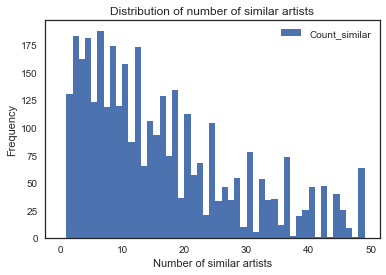

In [71]:
# Count the number of artists for all similarity lists
df_sim_count = df_sim_hot.groupby('artist_name').count()
df_sim_count = df_sim_count.drop('similar', 1)
df_sim_count.columns = ['Count_similar']

# Focus only on the artists with under 50 similar artists
bin_range = list(range(0, 50))
# Plot the distribution of counts
df_sim_count.plot.hist(bins=bin_range)
plt.xlabel('Number of similar artists')
plt.title('Distribution of number of similar artists')
plt.show()

It is interesting to note that no artist has no similar other artist. However most of them have under 30 similar artists.  

We now want to look the top 10 artists which are in the most similar lists.

In [72]:
# Merge the additional similarity data with our main data according to the pointing similar artists
df_sim_top = df_similarity.merge(df.ix[:, ['artist_id', 'artist_name']], left_on='similar', right_on='artist_id')
df_sim_top = df_sim_top.drop('artist_id', 1)
df_sim_top.head()

,target,similar,artist_name
0,AR009211187B989185,ARHINI31187B995C1D,Singing Melody
1,AR009211187B989185,ARHINI31187B995C1D,Singing Melody
2,AR009211187B989185,ARHINI31187B995C1D,Singing Melody Feat. Robyn
3,AR009211187B989185,ARHINI31187B995C1D,Singing Melody
4,AR009211187B989185,ARHINI31187B995C1D,Singing Melody


In [73]:
# Display the top 10 artists with the most references in similar lists
df_sim_top = df_sim_top.groupby('artist_name').count().sort_values('target', ascending=False).drop('target', 1)
df_sim_top[:10]

,similar
artist_name,
The Rolling Stones,1144
Sugar Minott,636
Stevie Ray Vaughan And Double Trouble,600
Radiohead,594
Sex Pistols,512
Van Halen,477
Hank Locklin,468
RUN-DMC,440
EPMD,400


It is interesting to note that the similarity lists, indeed if we look at the top 10 of length in similar lists, we do not obtain the same results which shows that similarities are indeed directed:

In [74]:
# Display the top 10 artists with the longest similar list
df_sim_count.sort_values('Count_similar', ascending=False)[:10]

,Count_similar
artist_name,
Bill & Gloria Gaither,334
Hank Locklin,306
Mario Rosenstock,299
Skeeter Davis,297
Aerosmith,288
Red Hot Chili Peppers,270
Tony Joe White,264
Jimmy Riley,252
Sugar Minott,252


### To go further: PageRank for artists

Because the previous analysis might not lead to the most influencial artists, we could create a directed graph with each artist being a node and we would add one edge when one artist is similar to another one. We would then follow the PageRank Algorithm as follows:
$$ I(A) = (1-d) + d (I(A1)/S(A1) + ... + I(An)/S(An)) $$
where:
- I(A) is the Influence of artist A,
- I(Ai) is the Influence of artist Ai which link to artist A,
- S(Ai) is the number of outbound links on artist Ai, i.e. the number of similar artist of Ai
- d is a damping factor which can be set between 0 and 1.

# Milestone 3

For this milestone, we decided to work on the full dataset, so that we could learn spark and get more statistically relevant results. Some parts of the code are then supposed to run in the cluster and won't work in this notebook.

Our analysis in milestone 2 made us realize that by using the tags as genres of music was problematic since we would have genres such as United States, or hip/hop and hip hop would count as two different genres. Since we don't have the genres for each song in the dataset we decided to still use the tags but in a smarter way.  
  
Moreover, we sharpen our analysis on the similar lists of artists in order to see who influences what genre. As we have seen in milestone 2, simply taking the hottest or the most familiar artist is too naïve because these scores are computed according to 2010. We want to go further than just select the artists that appears in the most similarity lists for each main tags so we decide to apply graph theory using the *artist_similarity* feature of the dataset.

First, we will see how to [parse the full dataset](#Parsing-the-full-dataset)

Then we will see how we [clustered the tags into main tags](#Clustering-the-tags)

We then followed with a [analysis of the tags](#Analysis-of-the-data) to create an interactive map. 

Then we created a [PageRank system](#PageRank) that would list the best artists per genres.

Last but not least, we created a [javascript website](#The-website) to display our results.

## Parsing the full dataset

As mentionned, we this time used the full dataset on spark. Below is the code that ran on the cluster. As we needed to use the package tables to parse the dataset, we weren't able to run it on the worker nodes since the package wasn't installed on them. In addition, the package couldn't open hdfs files so we had to use the local copy in /buffer. We created a json that was available on the /buffer/pace for others to use, as mentionned on mattermost. 

In [ ]:
import os
import json
import hdf5_getters3 as hdf5_getters
import numpy as np
from pyspark import SparkConf, SparkContext

def create_csv():
    """
    This function reads hd5 files and returns a list of dictionnary corresponding to the songs
    """
    rows = []
    counter = 1
    written = 0
    # We will cover each h5 files
    for (dirpath, dirnames, filenames) in os.walk("/buffer/million-song/dataset/"):
        if "AdditionalFiles" in dirpath:
            continue
        for filename in filenames:
            # This is just verbosity
            if counter % 100000 == 0:
                print(str(int(counter / 10000)) + "%")
                # We do checkpoints
                with open('/buffer/pace/metadata2.json', 'a+') as f:
                    json.dump(rows[written:], f)
                written = len(rows)
            counter += 1
            # We extract the metadata we are interested in.
            # If it's not nan, we have to convert it from a numpy type to a python built-in type because the json
            # library can't handle it otherwise
            h5 = hdf5_getters.open_h5_file_read(os.path.join(dirpath, filename))
            dic = dict()
            dic['track_id'] = str(hdf5_getters.get_track_id(h5))
            dic['title'] = str(hdf5_getters.get_title(h5))
            dic['song_id'] = str(hdf5_getters.get_song_id(h5))
            dic['artist_id'] = str(hdf5_getters.get_artist_id(h5))
            dic['artist_mbid'] = str(hdf5_getters.get_artist_mbid(h5))
            dic['artist_name'] = str(hdf5_getters.get_artist_name(h5))
            dic['artist_familiarity'] = hdf5_getters.get_artist_familiarity(h5)
            if dic['artist_familiarity'] != np.nan:
                dic['artist_familiarity'] = float(dic['artist_familiarity'])
            dic['artist_similarity'] = [str(item.replace("\n", "")) for item in hdf5_getters.get_similar_artists(h5)]
            dic['artist_latitude'] = hdf5_getters.get_artist_latitude(h5)
            if dic['artist_latitude'] != np.nan:
                dic['artist_latitude'] = float(dic['artist_latitude'])
            dic['artist_longitude'] = hdf5_getters.get_artist_longitude(h5)
            if dic['artist_longitude'] != np.nan:
                dic['artist_longitude'] = float(dic['artist_longitude'])
            dic['artist_mbtags'] = [str(item.replace("\n", "")) for item in hdf5_getters.get_artist_mbtags(h5)]
            dic['artist_hotttnesss'] = hdf5_getters.get_artist_hotttnesss(h5)
            if dic['artist_hotttnesss'] != np.nan:
                dic['artist_hotttnesss'] = float(dic['artist_hotttnesss'])
            dic['artist_terms'] = [str(item.replace("\n", "")) for item in hdf5_getters.get_artist_terms(h5)]
            dic['danceability'] = hdf5_getters.get_danceability(h5)
            if dic['danceability'] != np.nan:
                dic['danceability'] = float(dic['danceability'])
            dic['energy'] = hdf5_getters.get_energy(h5)
            if dic['energy'] != np.nan:
                dic['energy'] = float(dic['energy'])
            dic['duration'] = hdf5_getters.get_duration(h5)
            if dic['duration'] != np.nan:
                dic['duration'] = float(dic['duration'])
            dic['key'] = hdf5_getters.get_key(h5)
            if dic['key'] != np.nan:
                dic['key'] = int(dic['key'])
            dic['loudness'] = hdf5_getters.get_loudness(h5)
            if dic['loudness'] != np.nan:
                dic['loudness'] = float(dic['loudness'])
            dic['song_hotttnesss'] = hdf5_getters.get_song_hotttnesss(h5)
            if dic['song_hotttnesss'] != np.nan:
                dic['song_hotttnesss'] = float(dic['song_hotttnesss'])
            dic['tempo'] = hdf5_getters.get_tempo(h5)
            if dic['tempo'] != np.nan:
                dic['tempo'] = float(dic['tempo'])
            dic['year'] = hdf5_getters.get_year(h5)
            if dic['year'] != np.nan:
                dic['year'] = int(dic['year'])
            rows.append(dic)
            h5.close()
    return rows


print('started')
print(os.getpid())
sc = SparkContext()
rows = create_csv()
# We save the file
with open('/buffer/pace/metadata_total2.json', 'w+') as f:
    json.dump(rows, f)
print('ended')

## Clustering the tags

For our analysis, it was imperative we could have the genres of the songs. In milestone 2 we created a not so fancy worldmap but based on the tags of the songs. We colored each country by the most common tag. Even though we could uncover a few patterns, it became clear it was relatively flawed. Tags can often mean the same thing, hip-hop is the same as hip/hop yet we would color it as two different things. Hence birthed the idea of clustering the tags together and filtering them down. We first started by removing the country names from the tags as they did not represented any genre. We however decided to leave their substantive forms since they can sometimes represent a genre (french music and italian music could be considered as two musical genres).    
Then to cluster them together, we first selected the 500 most common tags and considered them as our main genres. We decided to take 500 tags to have a relatively fine grained representation that could provide detailed maps in different periods. If we had used less tags, we would have gotten maps where we wouldn't see the  evolution through time as much as we currently can because they wouldn't be able to grasp the small differences between the genres. After selecting the 500 main tags, we classified each remaining tag into the main tag it most often appeared with. For example, let's say the 'Swedish death metal' was often in songs that were also tagged 'death metal', we will consider 'Swedish death metal' to be a subgenre of 'death metal'. While this approach worked great for the most common subgenre tags as we had a lot of songs to infer the main genre, it somewhat performed a little bit less accurately for sub genres that were present in only a few genres.

Below is the code that ran on spark to find the main tags and cluster the minor tags into the main tags.


In [ ]:
import json
from pyspark.sql import HiveContext, Row
from pyspark import SparkConf, SparkContext
import csv
from io import StringIO
import numpy as np
import pickle

NUMBER_OF_MAIN_TAGS = 500

sc = SparkContext()

# We load the data
with open("/buffer/pace/metadata_total2.json") as f:
    df = sc.parallelize(json.load(f))


# this is the country names so that we remove the tags that are countries
country_names = ['aruba', 'afghanistan', 'angola', 'anguilla', 'aland islands', 'albania', 'andorra', 'united arab emirates', 'argentina', 'armenia', 'american samoa', 'antarctica', 'french southern territories', 'antigua and barbuda', 'australia', 'austria', 'azerbaijan', 'burundi', 'belgium', 'benin', 'bonaire, sint eustatius and saba', 'burkina faso', 'bangladesh', 'bulgaria', 'bahrain', 'bahamas', 'bosnia and herzegovina', 'saint barthelemy', 'belarus', 'belize', 'bermuda', 'bolivia, plurinational state of', 'brazil', 'barbados', 'brunei darussalam', 'bhutan', 'bouvet island', 'botswana', 'central african republic', 'canada', 'cocos (keeling) islands', 'switzerland', 'chile', 'china', "cote d'ivoire", 'cameroon', 'congo, the democratic republic of the', 'congo', 'cook islands', 'colombia', 'comoros', 'cabo verde', 'costa rica', 'cuba', 'curacao', 'christmas island', 'cayman islands', 'cyprus', 'czechia', 'germany', 'djibouti', 'dominica', 'denmark', 'dominican republic', 'algeria', 'ecuador', 'egypt', 'eritrea', 'western sahara', 'spain', 'estonia', 'ethiopia', 'finland', 'fiji', 'falkland islands (malvinas)', 'france', 'faroe islands', 'micronesia, federated states of', 'gabon', 'united kingdom', 'georgia', 'guernsey', 'ghana', 'gibraltar', 'guinea', 'guadeloupe', 'gambia', 'guinea-bissau', 'equatorial guinea', 'greece', 'grenada', 'greenland', 'guatemala', 'french guiana', 'guam', 'guyana', 'hong kong', 'heard island and mcdonald islands', 'honduras', 'croatia', 'haiti', 'hungary', 'indonesia', 'isle of man', 'india', 'british indian ocean territory', 'ireland', 'iran, islamic republic of', 'iraq', 'iceland', 'israel', 'italy', 'jamaica', 'jersey', 'jordan', 'japan', 'kazakhstan', 'kenya', 'kyrgyzstan', 'cambodia', 'kiribati', 'saint kitts and nevis', 'korea, republic of', 'kuwait', "lao people's democratic republic", 'lebanon', 'liberia', 'libya', 'saint lucia', 'liechtenstein', 'sri lanka', 'lesotho', 'lithuania', 'luxembourg', 'latvia', 'macao', 'saint martin (french part)', 'morocco', 'monaco', 'moldova, republic of', 'madagascar', 'maldives', 'mexico', 'marshall islands', 'macedonia, republic of', 'mali', 'malta', 'myanmar', 'montenegro', 'mongolia', 'northern mariana islands', 'mozambique', 'mauritania', 'montserrat', 'martinique', 'mauritius', 'malawi', 'malaysia', 'mayotte', 'namibia', 'new caledonia', 'niger', 'norfolk island', 'nigeria', 'nicaragua', 'niue', 'netherlands', 'norway', 'nepal', 'nauru', 'new zealand', 'oman', 'pakistan', 'panama', 'pitcairn', 'peru', 'philippines', 'palau', 'papua new guinea', 'poland', 'puerto rico', "korea, democratic people's republic of", 'portugal', 'paraguay', 'palestine, state of', 'french polynesia', 'qatar', 'reunion', 'romania', 'russian federation', 'rwanda', 'saudi arabia', 'sudan', 'senegal', 'singapore', 'south georgia and the south sandwich islands', 'saint helena, ascension and tristan da cunha', 'svalbard and jan mayen', 'solomon islands', 'sierra leone', 'el salvador']
country_names += ['san marino', 'somalia', 'saint pierre and miquelon', 'serbia', 'south sudan', 'sao tome and principe', 'suriname', 'slovakia', 'slovenia', 'sweden', 'swaziland', 'sint maarten (dutch part)', 'seychelles', 'syrian arab republic', 'turks and caicos islands', 'chad', 'togo', 'thailand', 'tajikistan', 'tokelau', 'turkmenistan', 'timor-leste', 'tonga', 'trinidad and tobago', 'tunisia', 'turkey', 'tuvalu', 'taiwan, province of china', 'tanzania, united republic of', 'uganda', 'ukraine', 'united states minor outlying islands', 'uruguay', 'united states', 'uzbekistan', 'holy see (vatican city state)', 'saint vincent and the grenadines', 'venezuela, bolivarian republic of', 'virgin islands, british', 'virgin islands, u.s.', 'viet nam', 'vanuatu', 'wallis and futuna', 'samoa', 'yemen', 'south africa', 'zambia', 'zimbabwe']
country_names = sc.broadcast(country_names)


# This method removes tags that are countries
def remove_country_tags(row):
    tags_eval = row['artist_terms']
    new_tags = []
    is_country = False
    # For each tag, check if it's a country
    for tag in tags_eval:
        for country in country_names.value:
            if(tag.lower() == country.lower()):
                is_country = True
                break
        if not is_country:
            new_tags.append(tag)
        is_country = False
    new_dict = dict()
    # Instead of returning the full song metadata, we only return what we will use later on. Otherwise we get
    # a memory error on the worker nodes.
    new_dict['artist_terms'] = new_tags
    new_dict['artist_id'] = row['artist_id']
    new_dict['year'] = row['year']
    new_dict['artist_name'] = row['artist_name']
    return new_dict

df_wo_country = df.map(remove_country_tags)
df_wo_country.cache()
print(df_wo_country.count())
# We get the tags
tags_general = df_wo_country.flatMap(lambda row: row['artist_terms'])
# We get the tags with their number of occurences
tags_w_counts = tags_general.map(lambda tag: (tag, 1)).reduceByKey(lambda x, y: x + y)
print(tags_w_counts.take(10))
# We sort them by their number of appearances
tags_w_counts_sorted = tags_w_counts.sortBy((lambda tag: tag[1]), ascending=False).map(lambda tag_w_count: tag_w_count[0])
tags_collected = tags_w_counts_sorted.collect()
# We keep the 500 main tags
main_tags = tags_collected[:NUMBER_OF_MAIN_TAGS]
# We will cluster the rest
non_main_tags = tags_collected[NUMBER_OF_MAIN_TAGS:]
# We broadcast this big variable so it's faster
main_tags_sc = sc.broadcast(main_tags)

def find_main_tag_for_non_main_tag():
    main_tag_for_non_main_tag = dict()
    # For each tag we need to cluster
    for idx_enumerate, non_main_tag in enumerate(non_main_tags):
        # We find the main tag it should be clustered in. (basicly the tag it appears the most often with)
        main_tags_for_this_tag = df_wo_country.filter(lambda row: non_main_tag in row['artist_terms']).flatMap(lambda row: row['artist_terms']).filter(lambda tag: tag in main_tags_sc.value).map(lambda tag: (tag, 1)).reduceByKey(lambda x, y: x + y).sortBy((lambda tag: tag[1]), ascending=False)
        # If there is an equality between two main tags, we take the most common one.
        collected = main_tags_for_this_tag.take(10)
        if len(collected) > 1 and collected[0][1] == collected[1][1]:
            best_idx = main_tags.index(collected[0][0])
            i = 1
            while i < len(collected) and collected[i - 1][1] == collected[i][1]:
                idx = main_tags.index(collected[i][0])
                if idx < best_idx:
                    best_idx = idx
                i += 1
            main_tag_for_non_main_tag[non_main_tag] = main_tags[best_idx]
        elif len(collected) != 0:
            main_tag_for_non_main_tag[non_main_tag] = collected[0][0]
        else:
            # If we don't have a main tag for this tag, we add it to the list of main tags
            main_tag_for_non_main_tag[non_main_tag] = non_main_tag
        print(non_main_tag, "--->", main_tag_for_non_main_tag[non_main_tag])
        print(idx_enumerate, "/", len(non_main_tags))
    return main_tag_for_non_main_tag


main_tag_for_non_main_tag = find_main_tag_for_non_main_tag()
# We store this data
pickle.dump(main_tag_for_non_main_tag, open("/buffer/pacito/main_tag_for_non_main_tag2.p", "wb"))
main_tag_for_non_main_tag = pickle.load(open("/buffer/pacito/main_tag_for_non_main_tag2.p", "rb"))
print(main_tag_for_non_main_tag)

# We want to replace the non_main_tags in each song by a main tag
def replace_non_main_tags_by_main_tag(row):
    # the new tags of the song
    new_tags = []
    # for each tag
    for tag in row['artist_terms']:
        # if it's  a main tag
        if tag not in main_tag_for_non_main_tag:
            # and is not currently in the new tags
            if tag not in new_tags:
                # add it to the new tags
                new_tags.append(tag)
        else:
            # if it's a minor tag, add the corresponding main tag if not already in the new tags
            corresponding_main = main_tag_for_non_main_tag[tag]
            if corresponding_main not in new_tags:
                new_tags.append(corresponding_main)
    new_row = row.copy()
    new_row['artist_terms'] = new_tags
    return new_row


df_wo_country_full_main_tags = df_wo_country.map(replace_non_main_tags_by_main_tag)
df_wo_country_full_main_tags.cache()
print(df_wo_country_full_main_tags.flatMap(lambda row: row['artist_terms']).map(lambda tag: (tag, 1)).reduceByKey(lambda x, y: x + y).count())
# Save the data
json.dump(df_wo_country_full_main_tags.collect(),open("/buffer/pacito/df_wo_country_full_main_tags2.json",'w+'))
# Instead of having the main tag per non_main_tag, we will have now the list of non_main_tag for each main tag
non_main_tags_per_main_tag = sc.parallelize(list(main_tag_for_non_main_tag)).map(lambda x:(x,main_tag_for_non_main_tag[x])).map(lambda x: (x[1], [x[0]])).reduceByKey(lambda x, y: list(np.unique(np.concatenate([x, y])))).filter(lambda x: len(x[0])>0)
# Save it too
json.dump(dict(non_main_tags_per_main_tag.collect()),open('/buffer/pacito/non_main_tags_per_main_tag2.json', 'w+'))

This code yielded two json. An updated datafile containing the metadata we are interested in; the "minor tags" that were clustered into main tags are replaced by their corresponding main tag. The second json contains the clustering; for each main tags, it shows which minor tags it clustered.

## Analysis of the data

First we needed to lookup the country of each artists from their latitute and longitude to be able to create our interactive map. To do that we first tried using the google API and geopy but we got blocked since we did to many requests. We however manage to find a algorithm which could find the country of the artists offline by Richard Penman and used it in spark. 

In [ ]:
#https://github.com/thampiman/reverse-geocoder
import reverse_geocode
import json

# Get the artists locations
with open("/buffer/million-song/dataset/AdditionalFiles/artist_location.txt") as f:
    lines = f.readlines()

print("we look up %s artist locations"% str(len(lines)))
# parse it
lines_splitted = list(map((lambda line : line.split("<SEP>")),lines))
artist_ids = list(map((lambda line : line[0]),lines_splitted))
coordinates = list(map((lambda line : (float(line[1]),float(line[2]))),lines_splitted))
# for the coordinate of each artist, we find the relevant country
countries = list(map((lambda place : place['country']),reverse_geocode.search(coordinates)))

# we save it
dict_artist_country = dict(list(zip(artist_ids,countries)))
print(len(dict_artist_country))
json.dump(dict_artist_country, open("/buffer/pacito/artist_country.json",'w+'))

After finding the country of each artists, we proceeded in finding the most common main tag per country and give it a color. Unfortunately, the cluster doesn't have mathplotlib installed so we assign to each country a number representing its color. We then locally used mathplotlib to convert these numbers to colors

Below is the code that ran on the cluster to do that.

In [ ]:
from pyspark import SparkConf, SparkContext
import json
import numpy as np

# Loading the metadata and artists locations
sc = SparkContext()
print("starting")
with open("/buffer/pacito/df_wo_country_full_main_tags2.json") as f:
    df = sc.parallelize(json.load(f))
df.cache()
with open("/buffer/pacito/artist_country.json") as f:
    bc_artist_country = sc.broadcast(json.load(f))
print("data loaded")

# this method find the best tags of each country 
def best_tags_per_country(df, color_per_tag=None, color_counter = 0):
    # This method tells if we have the location for this artist
    def is_located(artist_id):
        return artist_id in bc_artist_country.value

    def RGBA_to_hex(argb):
        hex_='#'
        for i in argb:
            hex_+=str(hex(int(i*255)).split('x')[-1].zfill(2))
        return hex_
    # We only keep the songs that we can locate
    # We get the tags per country
    df_tags_per_countries = df.filter(lambda row : is_located(row['artist_id'])).map(lambda row : (bc_artist_country.value[row['artist_id']], row['artist_terms'])).reduceByKey(lambda x,y: x+y)
    df_tags_per_countries.cache()
    # the countries list
    countries = df_tags_per_countries.map(lambda x:x[0]).collect()
    print("Countries list computed")
    print(countries)
    best_tag_per_country = dict()
    picked_up_tags = []
    # For each country
    for country in countries:
        print(country)
        # we find the best tag
        best_tag = df_tags_per_countries.filter(lambda country_tags: country_tags[0] == country).flatMap(lambda country_tags: country_tags[1]).map(lambda tag:(tag,1)).reduceByKey(lambda x,y:x+y).sortBy((lambda tag:tag[1]),ascending=False).take(1)[0][0]
        print(best_tag)
        best_tag_per_country[country] = best_tag
        # We keep track of the tags we have
        picked_up_tags.append(best_tag)
    print("best tags per country computed")

    # if color per tag is given we use this one, otherwise we create it
    if color_per_tag is None:
        color_per_tag = dict()
    color_per_tag_this = dict()
    color_per_country = dict()
    
    # Now we color the countries depending on their tag
    for country in countries:
        most_frequent_tag = best_tag_per_country[country]
        if not (most_frequent_tag in color_per_tag):
            color_per_tag[most_frequent_tag] = color_counter
            color_counter+=1
        color_per_tag_this[most_frequent_tag] = color_per_tag[most_frequent_tag]
        color_per_country[country] = color_per_tag[most_frequent_tag]
    print("colors per country and legend computed")
    return color_per_country, color_per_tag_this, color_per_tag, color_counter

# we calculate the colors per country for the different periods of time we want.
color_per_country, color_per_tag_this, color_per_tag, color_counter  = best_tags_per_country(df)
json.dump(color_per_country, open("/buffer/pacito/maps/color_per_country.json",'w+'))
json.dump(color_per_tag_this, open("/buffer/pacito/maps/color_per_tag.json",'w+'))
print('Total Map computed')

color_per_country_2000_2010, color_per_tag_2000_2010, color_per_tag, color_counter = best_tags_per_country(df.filter(lambda row : 2000<row['year']<=2010),color_per_tag, color_counter)
json.dump(color_per_country_2000_2010, open("/buffer/pacito/maps/color_per_country_2000_2010.json",'w+'))
json.dump(color_per_tag_2000_2010, open("/buffer/pacito/maps/color_per_tag_2000_2010.json",'w+'))
print('2000-2010 Map computed')

color_per_country_1990_2000, color_per_tag_1990_2000,color_per_tag, color_counter = best_tags_per_country(df.filter(lambda row : 1990<row['year']<=2000),color_per_tag, color_counter)
json.dump(color_per_country_1990_2000, open("/buffer/pacito/maps/color_per_country_1990_2000.json",'w+'))
json.dump(color_per_tag_1990_2000, open("/buffer/pacito/maps/color_per_tag_1990_2000.json",'w+'))
print('1990-2000 Map computed')

color_per_country_1980_1990, color_per_tag_1980_1990,color_per_tag, color_counter = best_tags_per_country(df.filter(lambda row : 1980<row['year']<=1990),color_per_tag, color_counter)
json.dump(color_per_country_1980_1990, open("/buffer/pacito/maps/color_per_country_1980_1990.json",'w+'))
json.dump(color_per_tag_1980_1990, open("/buffer/pacito/maps/color_per_tag_1980_1990.json",'w+'))
print('1980-1990 Map computed')

color_per_country_1970_1980, color_per_tag_1970_1980,color_per_tag, color_counter = best_tags_per_country(df.filter(lambda row : 1970<row['year']<=1980),color_per_tag, color_counter)
json.dump(color_per_country_1970_1980, open("/buffer/pacito/maps/color_per_country_1970_1980.json",'w+'))
json.dump(color_per_tag_1970_1980, open("/buffer/pacito/maps/color_per_tag_1970_1980.json",'w+'))
print('1970-1980 Map computed')

color_per_country_1950_1970, color_per_tag_1950_1970,color_per_tag, color_counter = best_tags_per_country(df.filter(lambda row : 1950<row['year']<=1970),color_per_tag, color_counter)
json.dump(color_per_country_1950_1970, open("/buffer/pacito/maps/color_per_country_1950_1970.json",'w+'))
json.dump(color_per_tag_1950_1970, open("/buffer/pacito/maps/color_per_tag_1950_1970.json",'w+'))
print('1950-1970 Map computed')

color_per_country_1920_1950, color_per_tag_1920_1950,color_per_tag, color_counter = best_tags_per_country(df.filter(lambda row : 1920<row['year']<=1950),color_per_tag, color_counter)
json.dump(color_per_country_1920_1950, open("/buffer/pacito/maps/color_per_country_1920_1950.json",'w+'))
json.dump(color_per_tag_1920_1950, open("/buffer/pacito/maps/color_per_tag_1920_1950.json",'w+'))
print('1920-1950 Map computed')


Below is the code that ran locally

In [ ]:
import  matplotlib.pyplot as plt
import json
import numpy as np
import os

def RGBA_to_hex(argb):
    """
    function that translates RGBA to hex which is used in folium
    """
    hex_='#'
    for i in argb:
        hex_+=str(hex(int(i*255)).split('x')[-1].zfill(2))
    return hex_

color_per_country=dict()
color_per_tag = dict()
n_colors = 0
# We count the numbers of colors we need to encode
for filename in os.listdir("maps"):
    print(filename)
    if "color_per_country" in filename and "hexed" not in filename:
        color_per_country[filename] = json.load(open("maps/"+filename))
        color_per_tag[filename] = json.load(open("maps/color_per_tag"+filename[len("color_per_country"):]))
        n_colors = max([n_colors,max([int(color_per_country[filename][c]) for c in color_per_country[filename]])])
# We create a color map
colors = plt.cm.get_cmap('gist_ncar', n_colors+1)
int_to_hex = dict()
# We encode the codes of the cluster into hex colors and save the hexed colors per country into jsons.
for i in range(n_colors+1):
    int_to_hex[i] = RGBA_to_hex(colors(i))
for filename in color_per_country:
    for country in color_per_country[filename]:
        color_per_country[filename][country]=int_to_hex[color_per_country[filename][country]]
    for tag in color_per_tag[filename]:
        color_per_tag[filename][tag] = int_to_hex[color_per_tag[filename][tag]]

    json.dump(color_per_tag[filename],open("maps/color_per_tag_hexed"+filename[len("color_per_country"):],'w+'))
    json.dump(color_per_country[filename],open("maps/color_per_country_hexed"+filename[len("color_per_country"):],'w+'))


This created two json files. One that contained the colors per country, one that contained the legend (the colors per tag).

However, after displaying the map, we realized the colors didn't make much sense since they were randomly chosen. So we decided to hardcolor them based on what they meant and assigne similar colors to similar genres.

An interactive map is great to see where the different genres come from and what kind of music people listen to in each country. It can however be somewhat difficult to see which are the main genres in a particular time period. This is also because we only see the main genre per country, but we are unable to see what is the second main genre of the said country. So that we can have a better insight of the different music currents in a particular time period. We built a stacked bar plot. It contains the main genres per time period and gives a better understanding of what kind of music people used to listen through time.

Below is the code that ran on the cluster to find the best tags per time period.


In [ ]:
from pyspark import SparkConf, SparkContext
import json
import numpy as np


sc = SparkContext()
print("starting")
with open("/buffer/pacito/df_wo_country_full_main_tags2.json") as f:
    df = sc.parallelize(json.load(f))
df.cache()
# Here we take the period we want and sort the tags to get the best ones per time period
def find_best_tags(df, n_tags, start_year, end_year):
    print(start_year,end_year)
    return  df.filter(lambda row: start_year<row['year']<=end_year).flatMap(lambda row: row['artist_terms']).map(lambda tag: (tag,1)).reduceByKey(lambda x,y:x+y).sortBy((lambda tag: tag[1]),ascending = False).take(n_tags)


best_tags = dict()
best_tags['all_time'] = find_best_tags(df,7,1900,2020)
best_tags['2000-2010'] = find_best_tags(df,7,2000,2010)
best_tags['1990-2000'] = find_best_tags(df,7,1990,2000)
best_tags['1970-1980'] = find_best_tags(df,7,1970,1980)
best_tags['1950-1970'] = find_best_tags(df,7,1950,1970)
best_tags['1920-1950'] = find_best_tags(df,7,1920,1950)

json.dump(best_tags, open("/buffer/pacito/best_tags_per_time_period.json",'w+'))

## PageRank

In this section, we focus on the artists. The goal is to determine who are the main influencers according to each period and each genre. As stated in milestone 2, only taking counts of the hotness or the familiarity would not make so much sense as they were computed in 2010. Hence, we will not go further in the hotness analysis.

> Note: In the milestone2, we indicated one path we could have chosen to follow: focus on the hotness of artists according to their localization and more specifically in the US. We chose to not dig into this analysis as it is out of the scope of our analysis and also because we decided not to focus on the *hotttnesss* feature of the dataset.

This we won't simply use the frequency of appearance in the similarity lists because if you have a very famous artist pointing to one less known artist, we want this latter to have a good weight as he might have influenced the famous artist.  
  
From this perspective, the first approach that comes to our mind is to create a graph with nodes being the artists and we link this node to the artists that are present in the similarity list. We then implement page rank as described in details of the milestone 2:  
$$ I(A) = (1-d) + d (I(A1)/S(A1) + ... + I(An)/S(An)) $$
where:
- I(A) is the Influence of artist A,
- I(Ai) is the Influence of artist Ai which link to artist A,
- S(Ai) is the number of outbound links on artist Ai, i.e. the number of similar artist of Ai
- d is a damping factor which can be set between 0 and 1.
  
We iteratively update all weights. By default, we select 100 iterations and d = 0.85

### Subset analysis

As seen in milestone 2, if we want to work on the subset we need to use the additional file with all links (not only the first 100). Indeed, if we take the *artist_similarity* feature, we would have artists pointing to non-existing artists in the subset. This is very important as we will actually use this feature when we have the whole dataset.


#### Pageranks
For now, we will look at the subset and to do so we will use the additional db file that provides artist similarities.  

In [25]:
# Fetch the data from the milestone2:
df_from_files = pd.read_csv('data/metadata.csv',encoding='utf-8')
# Fetch the similarity data from the similarity .db
con = sqlite3.connect('data/MillionSongSubset/AdditionalFiles/subset_artist_similarity.db')
df_similarity = pd.read_sql_query("SELECT * from similarity", con)

# Merge the additional similarity data with our main data
df_sim = df_similarity.merge(df_from_files.loc[:, ['artist_id', 'artist_name']], left_on='target', right_on='artist_id')
df_sim = df_sim.drop('target', 1)
print('We have %s artists with a similarity list.' % len(df_similarity.target.unique()))
df_sim.head()

We have 3766 artists with a similarity list.


,similar,artist_id,artist_name
0,ARHINI31187B995C1D,AR009211187B989185,Carroll Thompson
1,ARHINI31187B995C1D,AR009211187B989185,Carroll Thompson
2,ARI0PUX1187FB3F215,AR009211187B989185,Carroll Thompson
3,ARI0PUX1187FB3F215,AR009211187B989185,Carroll Thompson
4,AR9RTS51187B996CC8,AR009211187B989185,Carroll Thompson


In [21]:
# Create the graph using networkx library
import networkx as nx
G = nx.from_pandas_dataframe(df_sim, 'artist_id', 'similar')

# Implement pagerank with default parameters
pr = nx.pagerank(G, alpha=0.85, max_iter=100)

# Add the results scores to a dataframe
df_sim_artist = df_sim.drop_duplicates('artist_id')
df_sim_artist.loc[:,'pagerank'] = [pr[x] for x in df_sim_artist['artist_id']]
df_sim_pr = df_sim_artist.drop('similar', 1)
# display the best artists
df_sim_pr.sort_values(by='pagerank', ascending=False)[:10]

,artist_id,artist_name,pagerank
53121,ARFCUN31187B9AD578,The Rolling Stones,0.001709
22144,AR6XZ861187FB4CECD,The Beatles,0.001469
45244,ARDIBRT1187B9AF176,Led Zeppelin,0.001234
59743,ARH6W4X1187B99274F,Radiohead,0.000942
43366,ARD4C1I1187FB4B0C3,Pink Floyd,0.000937
37756,ARBFQ7L1187B9ACD48,The Velvet Underground,0.000935
67725,ARJA1841187FB3A029,David Bowie,0.000918
43101,ARD3LXU1187B9ABFC5,Sex Pistols,0.000882
75216,ARLR9U31187B9A71AD,The Stooges,0.000851
81157,ARNDL191187FB51583,Jimi Hendrix,0.000846


In order to confirm the assumption that we previously made regarding the irrelevance of *artist_similarity* of the metadata used only on the subset, we compute the pagerank on it.

In [38]:
# Fetch only the data we are interested in and parse the similarity lists
df_sim_meta = df_from_files[['artist_id', 'artist_name', 'artist_similarity']]
list_sims = df_sim_meta['artist_similarity'].str.replace('[', '').str.replace(']', '').str.replace('\'', '').str.split(', ')
df_sim_meta.loc[:,'list_sims'] = list_sims

# Create link dataframe:
# artist_id1  artist_name1  similar_to1
# artist_id1  artist_name1  similar_to2
# ...
df_artists = df_sim_meta.drop_duplicates(subset='artist_id')
s = df_artists.apply(lambda x: pd.Series(x['list_sims']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'similar_to'
df_links = df_artists.drop(['list_sims', 'artist_similarity'], axis=1).join(s)

# create the graph and apply pagerank
G2 = nx.from_pandas_dataframe(df_links, 'artist_id', 'similar_to')
pr = nx.pagerank(G2, alpha=0.85, max_iter=100)

# display the top artists
df_artists.loc[:,'pagerank'] = [pr[x] for x in df_artists['artist_id']]
df_artists.sort_values(by='pagerank', ascending=False)[['artist_id', 'artist_name', 'pagerank']][:10]

,artist_id,artist_name,pagerank
703,ARZJFLE12086C117FF,MN,0.000354
7382,ARLBXGO11F4C83E520,Inspector 9,0.000351
3990,ARZUVRN1269FB3759D,Mawatari Matsuko,0.000347
3458,ARVG1MI119B86678D4,X-tv,0.000345
5715,ARMTTWG11F4C83E6AE,Mohammad Nouri,0.000343
3794,ARXICPY122CC3B292D,Tanika Turner,0.000341
6422,AR77MEJ1187B98F8CA,Sleepy D,0.000338
1949,ARHAMVP1269FCD2C1C,Supertalented,0.000337
752,ARVNIVQ1250941026F,Dylan Kuo,0.000337
8498,ARGCFSQ122988F7D0B,Buckeye Politicians,0.000336


We can do two main observations with these two pageranks. First we note that indeed, when we use the similarity list inside the metadata, the pagerank is not accurate as we have artists pointing to ones that do not exists in the subset. However it might be relevant when we use the full dataset as we will see. The second observaion is that more famous artists appear in the top 10 such as The Beatles thanks to pagerank.  
  
We will hence use the additional file for further analysis on the subset.

#### Genre and period aggregation

In order to go further with our analysis, we will also take into account the main tags of the songs the year it  came out.

In [39]:
# Init parameters
num_main_tags = 20
num_top = 5
periods = np.array([1920, 1950, 1970, 1980, 1990, 2000, 2010])
num_periods = len(periods) - 1 

In [ ]:
# Split dataframes into a list of df for each periods
df_list = []
for idx, year in enumerate(periods):
    if idx != 0:
        period = range(periods[idx-1], year+1)
        df_period = df_tags[df_tags['year'].isin(period)]
        df_list.append(df_period)

# fetch top num_main_tags tags
def find_main_tags(df):
    # fetch main tags
    main_tags = [str(tag[0]) for tag in get_tags_ordered_by_freq(list(df['artist_terms']))[:num_main_tags]]
    return main_tags

We set the following metric in order to score how relevant is one artist according to each tags:
    $$score_{tag}=\frac{\text{frequence of appearance of one tag for one artist}}{\text{number of songs of the artist}}$$
    
    
This allows us to aggregate the tags with the pagerank previously computed. The idea is that we do not want to have a group to be the main influencers of jazz if he only did one music in 'jazz' and usually plays hard rock.

In [ ]:
def compute_score_tags(df):
    """
    compute the frequence of appearance divided by number of songs for each artist and each main tags
    """
    
    # take only the artists
    df_artist_tags = df.drop_duplicates('artist_id')
    # find main tags
    main_tags = find_main_tags(df)
    for i, tag in enumerate(main_tags):
        print(str(i+1)+'/'+str(num_main_tags))
        
        # init score for all artists
        name_score = tag+'_score'
        df_artist_tags[name_score]= [0]*df_artist_tags.shape[0]
        
        #compute the score for all artists
        for artist_id in df_artist_tags['artist_id']:
            freq_tag = 0
            num_songs = 0
            for other_artist in df[df['artist_id']==artist_id].values:
                if artist_id == other_artist[0]:
                    num_songs += 1
                    if tag in other_artist[2]:
                        freq_tag += 1
            score = float(freq_tag) / float(num_songs)
            tmp = df_artist_tags[name_score]
            tmp[df_artist_tags['artist_id']==artist_id] = score
            df_artist_tags[name_score] = tmp
            
    return df_artist_tags

# compute the frequency score
#df_list_scores = [compute_score_tags(df) for df in df_list]

# load the scores for each periods
df_list_scores = []
for idx, year in enumerate(periods):
    if idx != 0:
        df_list_scores.append(pd.read_json('data/pagerank/subset/artist_scores_'+str(periods[idx-1])+'_'+str(year)+'.json'))
        
# get rid of _score in the columns
for df_list_score in df_list_scores:
    cols = df_list_score.columns
    cols = [col.replace('_score', '') for col in cols]
    df_list_score.columns = cols
df_list_scores = [df_list_score.drop('year', axis=1) for df_list_score in df_list_scores]

We now combine these scores with the pagerank score previously computed.

In [63]:
# We compute the overall score by multiplying the pagerank of the artist with each tag frequency score
df_list_ranks = []
for df_scores in df_list_scores:
    df_to_merge = df_scores.drop(['artist_name', 'artist_terms'], axis=1)
    df_pagerank = df_sim_artist.merge(df_to_merge, on='artist_id')
    df_tag_scores = df_pagerank.iloc[:, 4:].multiply(df_pagerank['pagerank'], axis=0)
    df_rank = pd.concat([df_pagerank[['artist_id', 'artist_name']], df_tag_scores], axis=1)
    df_list_ranks.append(df_rank)

In [68]:
# find the top artists for each tags
df_list_tag_rank = []
for df_ranks in df_list_ranks:
    df_tag_rank = pd.DataFrame()
    for tag_score in df_ranks.columns[2:]:
        df_sorted = df_ranks.sort_values(by=tag_score, ascending=False)[:num_top]
        df_tag_rank[tag_score] = list(df_sorted['artist_name'])
    df_list_tag_rank.append(df_tag_rank)
    
# display the top artists for the first period in each main tags
df_list_tag_rank[0]

,acoustic blues,acoustic,american,blues-rock,blues,chicago blues,classic blues,country blues,country,delta blues,folk,gospel,guitar,jazz,louisiana blues,ragtime,rock,smooth jazz,texas blues,world
0,Sleepy John Estes,Sleepy John Estes,Blind Willie McTell,Sleepy John Estes,Sleepy John Estes,Sleepy John Estes,Sleepy John Estes,Sleepy John Estes,Sleepy John Estes,Sleepy John Estes,Sleepy John Estes,Sleepy John Estes,Sleepy John Estes,Sleepy John Estes,Sleepy John Estes,Sleepy John Estes,Sleepy John Estes,Sleepy John Estes,Sleepy John Estes,Sleepy John Estes
1,Blind Willie McTell,Blind Willie McTell,Bukka White,Blind Willie McTell,Blind Willie McTell,Blind Willie McTell,Blind Willie McTell,Blind Willie McTell,Blind Willie McTell,Blind Willie McTell,Blind Willie McTell,Blind Willie McTell,Blind Willie McTell,Blind Willie McTell,Blind Willie McTell,Blind Willie McTell,Blind Willie McTell,Blind Willie McTell,Blind Willie McTell,Blind Willie McTell
2,Bukka White,Bukka White,Ma Rainey,Bukka White,Bukka White,Bukka White,Bukka White,Bukka White,Bukka White,Bukka White,Bukka White,Bukka White,Bukka White,Bukka White,Bukka White,Bukka White,Bukka White,Bukka White,Bukka White,Bukka White
3,Ma Rainey,Blind Lemon Jefferson,Red Foley,Red Foley,Ma Rainey,Blind Lemon Jefferson,Ma Rainey,Blind Lemon Jefferson,Ma Rainey,Ma Rainey,Ma Rainey,Red Foley,Ma Rainey,Ma Rainey,Blind Lemon Jefferson,Ma Rainey,Ma Rainey,Blind Lemon Jefferson,Red Foley,Red Foley
4,Blind Lemon Jefferson,Charley Patton,Blind Lemon Jefferson,Charley Patton,Red Foley,Charley Patton,Blind Lemon Jefferson,Charley Patton,Red Foley,Blind Lemon Jefferson,Red Foley,Blind Lemon Jefferson,Blind Lemon Jefferson,Red Foley,Charley Patton,Blind Lemon Jefferson,Red Foley,Charley Patton,Blind Lemon Jefferson,Blind Lemon Jefferson


From this first period, we can observe that in most genre, the top artists tends to be the same. This is due to the fact that we do not have that much data between 1920 and 1950 especially if we take the subset.  
  
Regarding the visualization, it is important to note that even if we do not show a ranking for all periods it does not mean there is no artist that has this tag during this period. It simply means that the selected tag is not one of the top 20 tags during the period. This might be miss interpreted, we will hence fix this issue on the computations on the full dataset by also calculating the rankings for other periods even if it is not a famous tag during the period. This way, we will have a ranking for all periods given any tag.

### Full dataset

For the full dataset, we make use of the metadata *artist_similarity* of the main dataset. We basically apply the same algorithm as for the subset but instead of using networkx, we create the implementation on our own using spark. 
> Note that the following has to be run on the cluster. Also note that the code is inspired from the [apache/spark](https://github.com/apache/spark/blob/master/examples/src/main/python/pagerank.py) repo.
  
The code that has to be run on spark to compute the pageranks is shown below:

In [ ]:
import json
from pyspark import SparkConf, SparkContext
from io import StringIO
import numpy as np
from operator import add

# Initialize parameters
num_iter = 100
d = 0.85

# Run a spark context and open the data
sc = SparkContext()

with open("/buffer/pace/metadata_total2.json") as f:
    df = sc.parallelize(json.load(f))

# only fetch the links
links = df.map(lambda link: (link['artist_id'], link['artist_similarity']))
links = links.reduceByKey(lambda x,y:list(np.unique(x+y))).cache()

ranks = links.map(lambda similar_artists: (similar_artists[0], 1.0))

# compute the contribution given a list artists similar to one artist and its pagerank
def computeContribs(sim_list, rank):
    num_sim = len(sim_list)
    for sim in sim_list:
        yield (sim, rank / num_sim)

# iterate to compute the final rank
for i in range(num_iter):
    print(str(i)+'/'+str(num_iter))
    contribs = links.join(ranks).flatMap(lambda artist_sim_rank: computeContribs(artist_sim_rank[1][0], artist_sim_rank[1][1]))
    ranks = contribs.reduceByKey(add).mapValues(lambda rank: rank*d+(1-d))
    # store the results at the half
    if i == 50:
        ranks.cache()
        firsts = ranks.sortBy((lambda artist_rank: artist_rank[1]), ascending=False).collect()

        json.dump(firsts, open("/buffer/louison/pagerank.json", 'w+'))

# sort the values and store the file 
firsts = ranks.sortBy((lambda artist_rank: artist_rank[1]), ascending=False).collect()

json.dump(firsts, open("/buffer/louison/pagerank.json", 'w+'))

As we did for the subset we multiply each artist pagerank with a frequency score (see describtion above) for all main tags. We then multiply every column (main tags) with the pagerank score. Finally we store lists for all tags and only fetch the top artists for each main tags. The code to run on spark is shown above:

In [ ]:
from pyspark import SparkConf, SparkContext
import json
import numpy as np


sc = SparkContext()

def add_and_return(dic,freq,tag):
    dic[tag]=freq
    return dic

print("starting")
with open("/buffer/pacito/df_wo_country_full_main_tags2.json") as f:
    df = sc.parallelize(json.load(f))
df.cache()
print("data loaded")
# for each time frame we find the top20 tags
top20_tags_1920_1950 = df.filter(lambda row: 1920< row['year']<=1950).flatMap(lambda row: row['artist_terms']).map(lambda tag: (tag,1)).reduceByKey(lambda x,y:x+y).sortBy((lambda tag:tag[1]), ascending = False).map(lambda tag:tag[0]).take(20)
top20_tags_1950_1970 = df.filter(lambda row: 1950< row['year']<=1970).flatMap(lambda row: row['artist_terms']).map(lambda tag: (tag,1)).reduceByKey(lambda x,y:x+y).sortBy((lambda tag:tag[1]), ascending = False).map(lambda tag:tag[0]).take(20)
top20_tags_1970_1980 = df.filter(lambda row: 1970< row['year']<=1980).flatMap(lambda row: row['artist_terms']).map(lambda tag: (tag,1)).reduceByKey(lambda x,y:x+y).sortBy((lambda tag:tag[1]), ascending = False).map(lambda tag:tag[0]).take(20)
top20_tags_1980_1990 = df.filter(lambda row: 1980< row['year']<=1990).flatMap(lambda row: row['artist_terms']).map(lambda tag: (tag,1)).reduceByKey(lambda x,y:x+y).sortBy((lambda tag:tag[1]), ascending = False).map(lambda tag:tag[0]).take(20)
top20_tags_1990_2000 = df.filter(lambda row: 1990< row['year']<=2000).flatMap(lambda row: row['artist_terms']).map(lambda tag: (tag,1)).reduceByKey(lambda x,y:x+y).sortBy((lambda tag:tag[1]), ascending = False).map(lambda tag:tag[0]).take(20)
top20_tags_2000_2010 = df.filter(lambda row: 2000< row['year']<=2010).flatMap(lambda row: row['artist_terms']).map(lambda tag: (tag,1)).reduceByKey(lambda x,y:x+y).sortBy((lambda tag:tag[1]), ascending = False).map(lambda tag:tag[0]).take(20)

# we concatenate them and we will calculate the artist frequency for all of theses tags for each time period
tags = top20_tags_1920_1950+top20_tags_1950_1970+top20_tags_1970_1980+top20_tags_1980_1990+top20_tags_1990_2000+top20_tags_2000_2010
tags = list(np.unique(tags))

print(tags)
print('tags computed')

def find_freqs(df, tags):
    artists_freqs = dict() 
    # we calculate how many tags each artists has
    total_count_per_artist = df.map(lambda row: (row['artist_id'],len(row['artist_terms']))).reduceByKey(lambda x,y: x+y).cache()
    # For each tag we calculate the artist frequency
    for tag_idx,tag in enumerate(tags):
        print(tag_idx, tag)
        tag_count_per_artist = df.filter(lambda row: tag in row['artist_terms']).map(lambda row: (row['artist_id'],1)).reduceByKey(lambda x,y:x+y)
        joined = tag_count_per_artist.join(total_count_per_artist)
        frequencies = joined.map(lambda artist: (artist[0],float(artist[1][0])/artist[1][1]))
        artists_freqs[tag] = frequencies.collect()
    return artists_freqs

# We calculate the artist frequency
artists_freq_by_year = dict()
artists_freq_by_year['overall'] = find_freqs(df, tags)
artists_freq_by_year['1920-1950'] = find_freqs(df.filter(lambda row: 1920< row['year']<=1950), tags)
artists_freq_by_year['1950-1970'] = find_freqs(df.filter(lambda row: 1950< row['year']<=1970), tags)
artists_freq_by_year['1970-1980'] = find_freqs(df.filter(lambda row: 1970< row['year']<=1980), tags)
artists_freq_by_year['1980-1990'] = find_freqs(df.filter(lambda row: 1980< row['year']<=1990), tags)
artists_freq_by_year['1990-2000'] = find_freqs(df.filter(lambda row: 1990< row['year']<=2000), tags)
artists_freq_by_year['2000-2010'] = find_freqs(df.filter(lambda row: 2000< row['year']<=2010), tags)
# save it
json.dump(artists_freq_by_year, open('/buffer/pacito/artists_frequencies.json','w+'))

artists_freq_by_year = json.load(open('/buffer/pacito/artists_frequencies.json'))
parallelized_freq = dict()

# we parallize each element of the dict
for year in artists_freq_by_year:
    parallelized_freq[year] = dict()
    for tag in artists_freq_by_year[year]:
        print('parallizing',year, tag)     
        parallelized_freq[year][tag] = sc.parallelize(artists_freq_by_year[year][tag])
del artists_freq_by_year

# we load the previously calculated pagerank
print('loading pagerank')
pagerank = sc.parallelize(json.load(open('/buffer/louison/pagerank.json'))).cache()
print('starting computations')
# for each time period we multiply the artist frequency with pagerank and keep the bests.
for year in parallelized_freq:
    pagerank_frequed_year = dict()
    for tag in parallelized_freq[year]:
        print(year, tag)
        pagerank_frequed_year[tag]=parallelized_freq[year][tag].join(pagerank).map(lambda row: (row[0],row[1][0]*row[1][1])).sortBy((lambda row:row[1]),ascending=False).take(5)
    json.dump(pagerank_frequed_year, open('/buffer/pacito/pagerank/top_artist_tags_'+year.replace('-','_')+'.json','w+'))

As we stored the rank of the *artist_id*, we finally need to translate these id in order to visualize them. The code to run on spark is shown above:

In [ ]:
import json
from pyspark import SparkContext

sc = SparkContext()

with open('/buffer/million-song/dataset/AdditionalFiles/unique_artists.txt') as f:
    df = sc.parallelize(f.readlines())
# This file contains the translation artist_id to artist_name 
# parsing the lines
df = df.map(lambda line: line.split('<SEP>')).map(lambda line_splitted: (line_splitted[0],line_splitted[3].replace('\n','')))
df.cache()

# files to translate
files = ['top_artist_tags_1920_1950.json', 'top_artist_tags_1950_1970.json','top_artist_tags_1970_1980.json', 'top_artist_tags_1990_2000.json', 'top_artist_tags_2000_2010.json']
for json_file in files:
    print(json_file)
    with open('/buffer/pacito/pagerank/'+json_file) as f:
        df_top = json.load(f)
    # for each tag we will translate the artists
    result = dict()
    for tag in df_top:
        print(tag)
        tops = sc.parallelize(df_top[tag])
        tmp = tops.join(df)
        tmp = tmp.map(lambda row: (row[1][1], row[1][0])).sortBy((lambda x:x[1]),ascending=False).map(lambda row: row[0])
        result[tag] = tmp.collect()
        print(result[tag])
    json.dump(result, open('/buffer/pacito/pagerank/translated_'+json_file, 'w+'))

The top ranks can directly be seen on the website. We can choose a tag from a bigger list than the subset and see how main artists changed through time. Even though we speak about the full dataset, it is still not the full dataset as we only fetch the half of the dataset and it might cause the same issue as for the subset (with artists pointing to inexistants ones). For this reason, some rankings may not be so relevant. It gives however a good overview on who plays a big role in which genre for each periods. We could have simply taken the artist frequencies in the similarity lists as discussed in the milestone but it was interesting to implement this original approach.  
  
As the aim of PageRank is to not only compute the number of incomming edges, we wanted to find original artists that are pointed but the most famous ones. As we can see on the results with the tag rock for instance, most of the artists are not so well known but this is exactly the purpose we wanted to achieve using our customized algorithm.

## The website

We chose to represent our data using javascript, d3 and html in order to benefit from the interactivity and increased user experience of these tools : 

- The data is passed to the website with .json files loaded with d3. 
- Map : 
    * hovering over legend tab or country highlights all similar countries
    * clicking on map or legend loads the next map
    * the slider allow to sweep across the years
    * the play button displays the maps one after the other 
    
- Tags : 
    * hovering over a tag will make appear below the related information 
    * clicking on a tag will make the related information stay in case we want to scroll down and keep information 
    * Regarding clustering of tag for the subset: 
        * We parsed the first result of duckduckgo image to get the corresponding picture of the artist and corrected some, allowing to visualize more efficiently the artist concerned
        


    
If the windows is changed during visit, it has to be reloaded so the elements scale. 

The source code can be viewed in the repo or in the source of the [webpage](http://138.68.129.61/ada-site).

## Conclusion
With our analysis more in depth, we can clearly see an evolution in the genre and the artists throughout the past decades. We started in 1920 with jazz, blues and finished in 2010 with a lot of electronic, rock and pop songs. We also saw that each predominant genre in each country varies throughout the world, which means every country has its own style of music. Within this evolution, we tried to show who are the artists that hide behind these decades of music production in an original fashion. Yet, some surprising results are still to discuss.

All in all, from the big amount of data that we had to process and the complex results that we had to visualize, this project was a great challenge.